In [22]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [23]:
# dataset_path = "data/training/"

In [24]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [25]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [26]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/baru/db6/data_MfccDwtRmsCqtdb6L8.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_training_80/MVP/New_MVP_062.wav,-53.293186,-4.302275,-2.966106,-0.377814,-0.849013,0.336744,-1.027430,-4.318798,-3.635183,...,0.142986,0.136045,0.144629,0.153307,0.166171,0.178849,0.146576,0.065548,0.078201,MVP
1,../data/DWT_training_80/MVP/New_MVP_109.wav,-69.957848,-14.519680,-0.158950,3.041634,-1.478118,4.721298,16.346203,5.851961,4.111153,...,0.020612,0.096433,0.146900,0.185021,0.210062,0.177308,0.083968,0.061051,0.129732,MVP
2,../data/DWT_training_80/MVP/New_MVP_009.wav,-40.565670,14.211993,-9.502669,8.293732,-7.513834,5.944751,3.770758,4.553881,-3.161767,...,0.195063,0.142471,0.224419,0.280478,0.259688,0.238915,0.245696,0.233527,0.240312,MVP
3,../data/DWT_training_80/MVP/New_MVP_069.wav,-68.848663,-9.139095,-3.934860,3.783281,-5.722145,-3.455525,-16.591269,-14.929699,1.258185,...,0.109193,0.103009,0.061902,0.030690,0.040304,0.073938,0.098092,0.109438,0.080675,MVP
4,../data/DWT_training_80/MVP/New_MVP_028.wav,-66.667183,13.967198,-11.779913,1.414844,-10.274012,2.067990,7.954975,5.601587,-6.888347,...,0.131522,0.069580,0.035099,0.030499,0.078158,0.137553,0.136211,0.076397,0.048918,MVP


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 643.9+ KB


In [28]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [29]:
X.shape

(800, 101)

In [30]:
y.head()

0    MVP
1    MVP
2    MVP
3    MVP
4    MVP
Name: label, dtype: object

In [31]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-53.293186,-4.302275,-2.966106,-0.377814,-0.849013,0.336744,-1.027430,-4.318798,-3.635183,4.232965,...,0.147630,0.142986,0.136045,0.144629,0.153307,0.166171,0.178849,0.146576,0.065548,0.078201
1,-69.957848,-14.519680,-0.158950,3.041634,-1.478118,4.721298,16.346203,5.851961,4.111153,0.371099,...,0.055742,0.020612,0.096433,0.146900,0.185021,0.210062,0.177308,0.083968,0.061051,0.129732
2,-40.565670,14.211993,-9.502669,8.293732,-7.513834,5.944751,3.770758,4.553881,-3.161767,-0.920835,...,0.245581,0.195063,0.142471,0.224419,0.280478,0.259688,0.238915,0.245696,0.233527,0.240312
3,-68.848663,-9.139095,-3.934860,3.783281,-5.722145,-3.455525,-16.591269,-14.929699,1.258185,5.825118,...,0.077798,0.109193,0.103009,0.061902,0.030690,0.040304,0.073938,0.098092,0.109438,0.080675
4,-66.667183,13.967198,-11.779913,1.414844,-10.274012,2.067990,7.954975,5.601587,-6.888347,14.114242,...,0.175664,0.131522,0.069580,0.035099,0.030499,0.078158,0.137553,0.136211,0.076397,0.048918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-92.723137,-11.277813,-6.431083,-4.813422,-7.717014,-6.588925,10.639924,11.741686,-1.509836,-7.329999,...,0.136462,0.112582,0.117211,0.155621,0.142002,0.059632,0.077303,0.135627,0.131293,0.099555
796,-90.262230,-12.524983,8.173285,10.457461,-9.824757,-7.873189,3.982987,11.069017,-10.387888,8.076965,...,0.060391,0.066561,0.106588,0.107981,0.069836,0.080190,0.116353,0.096220,0.053129,0.053831
797,-49.315689,1.488296,5.804481,9.356359,5.624147,1.989249,2.146901,0.563731,-5.817533,-0.358189,...,0.046267,0.072866,0.113315,0.132479,0.123971,0.114200,0.121211,0.124835,0.098388,0.032689
798,-84.060394,6.402341,10.021681,-8.502731,-3.959278,-9.178020,10.038309,-5.455905,4.742564,-7.722189,...,0.155436,0.131606,0.139028,0.152023,0.142816,0.143634,0.139787,0.096290,0.102124,0.141828


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
y_test.shape

(160,)

In [34]:
X_train.shape

(640, 101)

In [35]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
264,-89.129799,7.498159,1.868862,-3.228122,3.527177,6.626835,0.202828,6.748829,-3.327462,-12.751877,...,0.092229,0.105469,0.112903,0.127482,0.132055,0.117232,0.102243,0.101838,0.096199,0.071595
615,-11.293312,1.271397,1.477200,18.408638,-3.945645,-2.572551,-1.730981,-12.686911,-5.364408,0.019272,...,0.252514,0.133076,0.033973,0.039014,0.097002,0.199897,0.278893,0.264873,0.156397,0.074345
329,-121.656845,-6.204558,-7.986874,-3.733565,-4.438098,0.844356,9.567704,7.300733,10.406880,16.863674,...,0.072059,0.029800,0.045422,0.068332,0.062993,0.071524,0.088289,0.062517,0.045646,0.075425
342,-68.828407,-4.346020,-9.534514,3.101364,-0.511141,11.382860,8.048492,-2.693849,-9.220671,-1.392661,...,0.059252,0.049152,0.126589,0.194210,0.204902,0.167928,0.154535,0.151020,0.083874,0.021938
394,-52.490528,-1.969320,-0.301546,3.202714,-0.230654,-9.781105,-14.422932,1.447102,9.426362,1.467415,...,0.158338,0.118717,0.070954,0.088600,0.106653,0.069544,0.027076,0.093823,0.114932,0.084934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-163.583450,-3.843339,4.080282,-0.819993,3.077821,0.850275,-19.157284,-0.687798,0.686746,-8.930761,...,0.020921,0.023122,0.027283,0.023535,0.010157,0.007499,0.006872,0.007737,0.021632,0.026892
106,-64.078957,-11.217961,8.694729,4.222540,4.575183,-1.655070,1.562994,1.272465,-4.347035,0.029527,...,0.126365,0.077500,0.026487,0.021200,0.024264,0.071987,0.126031,0.135171,0.098647,0.059528
270,-118.895348,-2.242753,-5.556136,4.421674,2.159789,-6.831596,-3.044461,-10.069485,-9.761402,-6.914430,...,0.054752,0.040507,0.022079,0.038856,0.065966,0.078264,0.065242,0.029839,0.036875,0.032446
435,-102.343010,-21.343025,-1.497907,4.852815,-5.573705,7.313853,0.477462,-3.957065,-4.852342,14.148817,...,0.045434,0.078634,0.100474,0.092551,0.056020,0.017160,0.052933,0.115638,0.165990,0.162184


In [36]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(160,)
(640, 101, 1)
(160, 101, 1)


In [37]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [38]:
X_train.shape[1], X_train.shape[2]

(101, 1)

In [39]:
def build_model(dropout_rate=0):
    model = models.Sequential(
        [
            tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
            tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            
            tf.keras.layers.BatchNormalization(),


            tf.keras.layers.Dense(5, activation='softmax')
        ]
    )
    # optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [40]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_2 (Flatten)         (None, 3232)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                206912    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                      

In [41]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras

# modeltuning=KerasClassifier(build_fn=build_model)
modeltuning=KerasClassifier(model=build_model,optimizer="adam",
                                      loss=keras.losses.categorical_crossentropy,
                                      batch_size=8,
                                      epochs=100,
                                      verbose=1,
                                      metrics=['accuracy'],
                                      validation_split=0.1)

params={
        'batch_size': [16, 32, 64],
        'epochs':[10, 20, 30, 40, 50],
        }
gs=GridSearchCV(estimator=modeltuning, param_grid=params, cv=10, verbose=1, scoring='balanced_accuracy')
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y, validation_data=(X_test, y_test))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 34ms/step - loss: 1.4509 - accuracy: 0.4042 - val_loss: 1.4775 - val_accuracy: 0.4000
Epoch 2/10
45/45 [==============================] - 1s 23ms/step - loss: 1.0680 - accuracy: 0.5694 - val_loss: 1.3672 - val_accuracy: 0.5875
Epoch 3/10
45/45 [==============================] - 1s 22ms/step - loss: 0.9048 - accuracy: 0.6653 - val_loss: 1.2784 - val_accuracy: 0.6938
Epoch 4/10
45/45 [==============================] - 1s 24ms/step - loss: 0.7729 - accuracy: 0.7333 - val_loss: 1.1800 - val_accuracy: 0.7063
Epoch 5/10
45/45 [==============================] - 1s 23ms/step - loss: 0.6664 - accuracy: 0.7750 - val_loss: 1.0412 - val_accuracy: 0.7750
Epoch 6/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5430 - accuracy: 0.8361 - val_loss: 0.8537 - val_accuracy: 0.8750
Epoch 7/10
45/45 [==============================] - 1s 25ms/step - loss: 0.4341 - accuracy: 0.8806 - val_loss: 0.7152 - val_accuracy: 0.8750
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 30ms/step - loss: 1.5321 - accuracy: 0.3556 - val_loss: 1.5391 - val_accuracy: 0.4062
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.1856 - accuracy: 0.5597 - val_loss: 1.4792 - val_accuracy: 0.4500
Epoch 3/10
45/45 [==============================] - 1s 20ms/step - loss: 1.0585 - accuracy: 0.6222 - val_loss: 1.3634 - val_accuracy: 0.5437
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.9651 - accuracy: 0.6556 - val_loss: 1.2747 - val_accuracy: 0.6750
Epoch 5/10
45/45 [==============================] - 1s 20ms/step - loss: 0.8380 - accuracy: 0.7319 - val_loss: 1.1333 - val_accuracy: 0.7812
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.7310 - accuracy: 0.7847 - val_loss: 0.9821 - val_accuracy: 0.7688
Epoch 7/10
45/45 [==============================] - 1s 20ms/step - loss: 0.5984 - accuracy: 0.8250 - val_loss: 0.9134 - val_accuracy: 0.6500
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 29ms/step - loss: 1.4864 - accuracy: 0.3708 - val_loss: 1.5339 - val_accuracy: 0.3000
Epoch 2/10
45/45 [==============================] - 1s 19ms/step - loss: 1.1590 - accuracy: 0.5653 - val_loss: 1.4561 - val_accuracy: 0.5500
Epoch 3/10
45/45 [==============================] - 1s 19ms/step - loss: 0.9979 - accuracy: 0.6250 - val_loss: 1.4065 - val_accuracy: 0.5437
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.8476 - accuracy: 0.7069 - val_loss: 1.2325 - val_accuracy: 0.7750
Epoch 5/10
45/45 [==============================] - 1s 19ms/step - loss: 0.7361 - accuracy: 0.7361 - val_loss: 1.1344 - val_accuracy: 0.7250
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6005 - accuracy: 0.8069 - val_loss: 0.9378 - val_accuracy: 0.8500
Epoch 7/10
45/45 [==============================] - 1s 19ms/step - loss: 0.4682 - accuracy: 0.8625 - val_loss: 0.8484 - val_accuracy: 0.8062
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 30ms/step - loss: 1.5113 - accuracy: 0.3819 - val_loss: 1.5492 - val_accuracy: 0.3750
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.1661 - accuracy: 0.5708 - val_loss: 1.4428 - val_accuracy: 0.4250
Epoch 3/10
45/45 [==============================] - 1s 20ms/step - loss: 1.0254 - accuracy: 0.6194 - val_loss: 1.3246 - val_accuracy: 0.6062
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.9151 - accuracy: 0.6722 - val_loss: 1.2142 - val_accuracy: 0.6625
Epoch 5/10
45/45 [==============================] - 1s 20ms/step - loss: 0.8116 - accuracy: 0.7167 - val_loss: 1.3080 - val_accuracy: 0.4187
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.7360 - accuracy: 0.7444 - val_loss: 1.0081 - val_accuracy: 0.7000
Epoch 7/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6270 - accuracy: 0.7944 - val_loss: 0.7780 - val_accuracy: 0.8313
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 30ms/step - loss: 1.5779 - accuracy: 0.3653 - val_loss: 1.5008 - val_accuracy: 0.4563
Epoch 2/10
45/45 [==============================] - 1s 21ms/step - loss: 1.1422 - accuracy: 0.5833 - val_loss: 1.3998 - val_accuracy: 0.6375
Epoch 3/10
45/45 [==============================] - 1s 24ms/step - loss: 0.9859 - accuracy: 0.6431 - val_loss: 1.3078 - val_accuracy: 0.6687
Epoch 4/10
45/45 [==============================] - 1s 21ms/step - loss: 0.8563 - accuracy: 0.6875 - val_loss: 1.2028 - val_accuracy: 0.7000
Epoch 5/10
45/45 [==============================] - 1s 24ms/step - loss: 0.7259 - accuracy: 0.7472 - val_loss: 1.0909 - val_accuracy: 0.7563
Epoch 6/10
45/45 [==============================] - 1s 23ms/step - loss: 0.5828 - accuracy: 0.8139 - val_loss: 0.9481 - val_accuracy: 0.8375
Epoch 7/10
45/45 [==============================] - 1s 22ms/step - loss: 0.4613 - accuracy: 0.8639 - val_loss: 0.7219 - val_accuracy: 0.9187
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 32ms/step - loss: 1.5673 - accuracy: 0.3264 - val_loss: 1.5070 - val_accuracy: 0.4187
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.2135 - accuracy: 0.5167 - val_loss: 1.4016 - val_accuracy: 0.5938
Epoch 3/10
45/45 [==============================] - 1s 20ms/step - loss: 1.0388 - accuracy: 0.6028 - val_loss: 1.3023 - val_accuracy: 0.6313
Epoch 4/10
45/45 [==============================] - 1s 21ms/step - loss: 0.9165 - accuracy: 0.6792 - val_loss: 1.1741 - val_accuracy: 0.7500
Epoch 5/10
45/45 [==============================] - 1s 20ms/step - loss: 0.7956 - accuracy: 0.7236 - val_loss: 1.1136 - val_accuracy: 0.7125
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.7037 - accuracy: 0.7694 - val_loss: 0.9017 - val_accuracy: 0.8313
Epoch 7/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5841 - accuracy: 0.8153 - val_loss: 0.8038 - val_accuracy: 0.8625
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 29ms/step - loss: 1.5861 - accuracy: 0.3389 - val_loss: 1.5334 - val_accuracy: 0.2875
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.1862 - accuracy: 0.5278 - val_loss: 1.4588 - val_accuracy: 0.6187
Epoch 3/10
45/45 [==============================] - 1s 19ms/step - loss: 0.9900 - accuracy: 0.6528 - val_loss: 1.3857 - val_accuracy: 0.6812
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.8763 - accuracy: 0.6861 - val_loss: 1.2838 - val_accuracy: 0.7312
Epoch 5/10
45/45 [==============================] - 1s 19ms/step - loss: 0.7567 - accuracy: 0.7278 - val_loss: 1.1530 - val_accuracy: 0.7937
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6508 - accuracy: 0.7806 - val_loss: 1.0154 - val_accuracy: 0.8250
Epoch 7/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5263 - accuracy: 0.8431 - val_loss: 0.8435 - val_accuracy: 0.8625
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 29ms/step - loss: 1.5327 - accuracy: 0.3347 - val_loss: 1.5421 - val_accuracy: 0.2438
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.1880 - accuracy: 0.5278 - val_loss: 1.4028 - val_accuracy: 0.5562
Epoch 3/10
45/45 [==============================] - 1s 20ms/step - loss: 1.0793 - accuracy: 0.5889 - val_loss: 1.3233 - val_accuracy: 0.5625
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.9523 - accuracy: 0.6472 - val_loss: 1.2075 - val_accuracy: 0.6687
Epoch 5/10
45/45 [==============================] - 1s 21ms/step - loss: 0.8328 - accuracy: 0.7042 - val_loss: 1.1542 - val_accuracy: 0.6438
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6836 - accuracy: 0.7736 - val_loss: 0.9462 - val_accuracy: 0.8125
Epoch 7/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6083 - accuracy: 0.7931 - val_loss: 0.8759 - val_accuracy: 0.7312
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 30ms/step - loss: 1.5848 - accuracy: 0.3208 - val_loss: 1.5218 - val_accuracy: 0.3562
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.1759 - accuracy: 0.5431 - val_loss: 1.4026 - val_accuracy: 0.4688
Epoch 3/10
45/45 [==============================] - 1s 21ms/step - loss: 1.0051 - accuracy: 0.6194 - val_loss: 1.3237 - val_accuracy: 0.5688
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.8721 - accuracy: 0.6708 - val_loss: 1.1944 - val_accuracy: 0.7188
Epoch 5/10
45/45 [==============================] - 1s 20ms/step - loss: 0.7341 - accuracy: 0.7347 - val_loss: 1.1146 - val_accuracy: 0.7375
Epoch 6/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6030 - accuracy: 0.8028 - val_loss: 0.9098 - val_accuracy: 0.8313
Epoch 7/10
45/45 [==============================] - 1s 20ms/step - loss: 0.5296 - accuracy: 0.8264 - val_loss: 0.7841 - val_accuracy: 0.8625
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 4s 30ms/step - loss: 1.5610 - accuracy: 0.3458 - val_loss: 1.5705 - val_accuracy: 0.2313
Epoch 2/10
45/45 [==============================] - 1s 20ms/step - loss: 1.2378 - accuracy: 0.5347 - val_loss: 1.4693 - val_accuracy: 0.4125
Epoch 3/10
45/45 [==============================] - 1s 20ms/step - loss: 1.0400 - accuracy: 0.6167 - val_loss: 1.3780 - val_accuracy: 0.6062
Epoch 4/10
45/45 [==============================] - 1s 20ms/step - loss: 0.9190 - accuracy: 0.6556 - val_loss: 1.3105 - val_accuracy: 0.5437
Epoch 5/10
45/45 [==============================] - 1s 20ms/step - loss: 0.8160 - accuracy: 0.7069 - val_loss: 1.1423 - val_accuracy: 0.7250
Epoch 6/10
45/45 [==============================] - 1s 21ms/step - loss: 0.7560 - accuracy: 0.7292 - val_loss: 1.0423 - val_accuracy: 0.6750
Epoch 7/10
45/45 [==============================] - 1s 20ms/step - loss: 0.6170 - accuracy: 0.7917 - val_loss: 0.9191 - val_accuracy: 0.7000
Epoch 8/10
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 29ms/step - loss: 1.5666 - accuracy: 0.3222 - val_loss: 1.5528 - val_accuracy: 0.2125
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.1898 - accuracy: 0.5444 - val_loss: 1.4006 - val_accuracy: 0.5437
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 1.0040 - accuracy: 0.6333 - val_loss: 1.3206 - val_accuracy: 0.6000
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8794 - accuracy: 0.6847 - val_loss: 1.2050 - val_accuracy: 0.6438
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.7510 - accuracy: 0.7458 - val_loss: 1.1260 - val_accuracy: 0.5813
Epoch 6/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6391 - accuracy: 0.7750 - val_loss: 1.0441 - val_accuracy: 0.6125
Epoch 7/20
45/45 [==============================] - 1s 21ms/step - loss: 0.5313 - accuracy: 0.8264 - val_loss: 0.7834 - val_accuracy: 0.8313
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 30ms/step - loss: 1.5327 - accuracy: 0.3556 - val_loss: 1.5127 - val_accuracy: 0.3750
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.1638 - accuracy: 0.5667 - val_loss: 1.4162 - val_accuracy: 0.5500
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 1.0167 - accuracy: 0.6125 - val_loss: 1.3053 - val_accuracy: 0.6750
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8784 - accuracy: 0.6931 - val_loss: 1.1733 - val_accuracy: 0.7125
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.7597 - accuracy: 0.7444 - val_loss: 1.0359 - val_accuracy: 0.7563
Epoch 6/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6740 - accuracy: 0.7792 - val_loss: 0.9542 - val_accuracy: 0.7563
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.5474 - accuracy: 0.8306 - val_loss: 0.7978 - val_accuracy: 0.8750
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 30ms/step - loss: 1.5120 - accuracy: 0.3833 - val_loss: 1.5434 - val_accuracy: 0.4938
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.1501 - accuracy: 0.5542 - val_loss: 1.4570 - val_accuracy: 0.4563
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 0.9973 - accuracy: 0.6333 - val_loss: 1.3304 - val_accuracy: 0.6000
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8486 - accuracy: 0.7111 - val_loss: 1.2252 - val_accuracy: 0.6438
Epoch 5/20
45/45 [==============================] - 1s 21ms/step - loss: 0.7583 - accuracy: 0.7250 - val_loss: 1.1336 - val_accuracy: 0.7250
Epoch 6/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6307 - accuracy: 0.7819 - val_loss: 0.9287 - val_accuracy: 0.7688
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.5630 - accuracy: 0.8250 - val_loss: 0.7701 - val_accuracy: 0.8250
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 30ms/step - loss: 1.6347 - accuracy: 0.3306 - val_loss: 1.6055 - val_accuracy: 0.3438
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.2436 - accuracy: 0.5167 - val_loss: 1.4669 - val_accuracy: 0.4000
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 1.0792 - accuracy: 0.5944 - val_loss: 1.3779 - val_accuracy: 0.6000
Epoch 4/20
45/45 [==============================] - 1s 21ms/step - loss: 0.9373 - accuracy: 0.6653 - val_loss: 1.3115 - val_accuracy: 0.4875
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8133 - accuracy: 0.7111 - val_loss: 1.1736 - val_accuracy: 0.6562
Epoch 6/20
45/45 [==============================] - 1s 20ms/step - loss: 0.7135 - accuracy: 0.7458 - val_loss: 1.0783 - val_accuracy: 0.6438
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6292 - accuracy: 0.7847 - val_loss: 1.0764 - val_accuracy: 0.5813
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 30ms/step - loss: 1.6179 - accuracy: 0.2778 - val_loss: 1.5571 - val_accuracy: 0.3313
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.3106 - accuracy: 0.4639 - val_loss: 1.4767 - val_accuracy: 0.4563
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 1.1303 - accuracy: 0.5722 - val_loss: 1.3794 - val_accuracy: 0.6313
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 1.0009 - accuracy: 0.6514 - val_loss: 1.3359 - val_accuracy: 0.5000
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8859 - accuracy: 0.6931 - val_loss: 1.1817 - val_accuracy: 0.7875
Epoch 6/20
45/45 [==============================] - 1s 21ms/step - loss: 0.8031 - accuracy: 0.7375 - val_loss: 1.0523 - val_accuracy: 0.7625
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6766 - accuracy: 0.7861 - val_loss: 0.8977 - val_accuracy: 0.8188
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 30ms/step - loss: 1.5379 - accuracy: 0.3486 - val_loss: 1.5055 - val_accuracy: 0.4313
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.0819 - accuracy: 0.5861 - val_loss: 1.3302 - val_accuracy: 0.6250
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 0.9337 - accuracy: 0.6514 - val_loss: 1.2546 - val_accuracy: 0.6250
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8676 - accuracy: 0.6833 - val_loss: 1.1775 - val_accuracy: 0.6625
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.7400 - accuracy: 0.7375 - val_loss: 0.9921 - val_accuracy: 0.7312
Epoch 6/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6836 - accuracy: 0.7389 - val_loss: 1.1194 - val_accuracy: 0.4938
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.5490 - accuracy: 0.8278 - val_loss: 0.7084 - val_accuracy: 0.8250
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 31ms/step - loss: 1.5754 - accuracy: 0.3194 - val_loss: 1.5113 - val_accuracy: 0.3875
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.2389 - accuracy: 0.5125 - val_loss: 1.4533 - val_accuracy: 0.3750
Epoch 3/20
45/45 [==============================] - 1s 20ms/step - loss: 1.0722 - accuracy: 0.6042 - val_loss: 1.3706 - val_accuracy: 0.4750
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.9465 - accuracy: 0.6514 - val_loss: 1.2131 - val_accuracy: 0.6562
Epoch 5/20
45/45 [==============================] - 1s 21ms/step - loss: 0.8208 - accuracy: 0.7111 - val_loss: 1.2414 - val_accuracy: 0.4375
Epoch 6/20
45/45 [==============================] - 1s 21ms/step - loss: 0.7230 - accuracy: 0.7556 - val_loss: 0.9012 - val_accuracy: 0.7937
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.5758 - accuracy: 0.7917 - val_loss: 0.7439 - val_accuracy: 0.8188
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 31ms/step - loss: 1.6377 - accuracy: 0.3000 - val_loss: 1.6128 - val_accuracy: 0.2250
Epoch 2/20
45/45 [==============================] - 1s 20ms/step - loss: 1.2395 - accuracy: 0.5194 - val_loss: 1.4546 - val_accuracy: 0.5063
Epoch 3/20
45/45 [==============================] - 1s 21ms/step - loss: 1.0650 - accuracy: 0.6056 - val_loss: 1.3654 - val_accuracy: 0.5813
Epoch 4/20
45/45 [==============================] - 1s 21ms/step - loss: 0.9383 - accuracy: 0.6611 - val_loss: 1.2844 - val_accuracy: 0.5875
Epoch 5/20
45/45 [==============================] - 1s 21ms/step - loss: 0.8047 - accuracy: 0.7194 - val_loss: 1.1265 - val_accuracy: 0.7437
Epoch 6/20
45/45 [==============================] - 1s 21ms/step - loss: 0.6824 - accuracy: 0.7972 - val_loss: 0.9864 - val_accuracy: 0.7688
Epoch 7/20
45/45 [==============================] - 1s 26ms/step - loss: 0.5554 - accuracy: 0.8417 - val_loss: 0.8572 - val_accuracy: 0.7500
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 4s 30ms/step - loss: 1.5950 - accuracy: 0.3069 - val_loss: 1.5497 - val_accuracy: 0.3313
Epoch 2/20
45/45 [==============================] - 1s 19ms/step - loss: 1.2170 - accuracy: 0.5167 - val_loss: 1.4694 - val_accuracy: 0.4750
Epoch 3/20
45/45 [==============================] - 1s 19ms/step - loss: 1.0462 - accuracy: 0.6167 - val_loss: 1.3819 - val_accuracy: 0.5938
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.9193 - accuracy: 0.6708 - val_loss: 1.2873 - val_accuracy: 0.6687
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.8115 - accuracy: 0.7194 - val_loss: 1.1562 - val_accuracy: 0.7563
Epoch 6/20
45/45 [==============================] - 1s 19ms/step - loss: 0.6687 - accuracy: 0.7806 - val_loss: 1.0304 - val_accuracy: 0.8625
Epoch 7/20
45/45 [==============================] - 1s 19ms/step - loss: 0.5380 - accuracy: 0.8514 - val_loss: 0.8457 - val_accuracy: 0.8750
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 3s 29ms/step - loss: 1.6061 - accuracy: 0.3389 - val_loss: 1.5548 - val_accuracy: 0.2500
Epoch 2/20
45/45 [==============================] - 1s 19ms/step - loss: 1.2193 - accuracy: 0.5458 - val_loss: 1.5038 - val_accuracy: 0.3375
Epoch 3/20
45/45 [==============================] - 1s 19ms/step - loss: 1.0563 - accuracy: 0.6014 - val_loss: 1.3877 - val_accuracy: 0.6062
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.9411 - accuracy: 0.6861 - val_loss: 1.2668 - val_accuracy: 0.6250
Epoch 5/20
45/45 [==============================] - 1s 19ms/step - loss: 0.8594 - accuracy: 0.6917 - val_loss: 1.1868 - val_accuracy: 0.6438
Epoch 6/20
45/45 [==============================] - 1s 20ms/step - loss: 0.7717 - accuracy: 0.7306 - val_loss: 1.1624 - val_accuracy: 0.5312
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.6615 - accuracy: 0.7764 - val_loss: 0.9780 - val_accuracy: 0.6313
Epoch 8/20
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 29ms/step - loss: 1.6017 - accuracy: 0.3167 - val_loss: 1.5831 - val_accuracy: 0.2812
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.2072 - accuracy: 0.5417 - val_loss: 1.4768 - val_accuracy: 0.4938
Epoch 3/30
45/45 [==============================] - 1s 19ms/step - loss: 1.0398 - accuracy: 0.6139 - val_loss: 1.3757 - val_accuracy: 0.5500
Epoch 4/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8715 - accuracy: 0.7181 - val_loss: 1.2771 - val_accuracy: 0.7000
Epoch 5/30
45/45 [==============================] - 1s 19ms/step - loss: 0.7752 - accuracy: 0.7167 - val_loss: 1.1228 - val_accuracy: 0.7688
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 0.5882 - accuracy: 0.8153 - val_loss: 0.9449 - val_accuracy: 0.7812
Epoch 7/30
45/45 [==============================] - 1s 19ms/step - loss: 0.5020 - accuracy: 0.8417 - val_loss: 0.7286 - val_accuracy: 0.8750
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 29ms/step - loss: 1.5342 - accuracy: 0.3222 - val_loss: 1.5632 - val_accuracy: 0.2375
Epoch 2/30
45/45 [==============================] - 1s 19ms/step - loss: 1.2627 - accuracy: 0.4764 - val_loss: 1.5033 - val_accuracy: 0.2812
Epoch 3/30
45/45 [==============================] - 1s 19ms/step - loss: 1.0607 - accuracy: 0.6000 - val_loss: 1.4144 - val_accuracy: 0.3500
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.9588 - accuracy: 0.6472 - val_loss: 1.2921 - val_accuracy: 0.6375
Epoch 5/30
45/45 [==============================] - 1s 19ms/step - loss: 0.7910 - accuracy: 0.7292 - val_loss: 1.1692 - val_accuracy: 0.6750
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 0.6896 - accuracy: 0.7667 - val_loss: 0.9958 - val_accuracy: 0.8062
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.5726 - accuracy: 0.8194 - val_loss: 0.8104 - val_accuracy: 0.8250
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 3s 29ms/step - loss: 1.6274 - accuracy: 0.3417 - val_loss: 1.5150 - val_accuracy: 0.2625
Epoch 2/30
45/45 [==============================] - 1s 19ms/step - loss: 1.1862 - accuracy: 0.5264 - val_loss: 1.3995 - val_accuracy: 0.3375
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 0.9989 - accuracy: 0.6111 - val_loss: 1.2952 - val_accuracy: 0.6125
Epoch 4/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8306 - accuracy: 0.7000 - val_loss: 1.1527 - val_accuracy: 0.7937
Epoch 5/30
45/45 [==============================] - 1s 19ms/step - loss: 0.7217 - accuracy: 0.7347 - val_loss: 1.1003 - val_accuracy: 0.7500
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 0.6166 - accuracy: 0.7889 - val_loss: 0.9433 - val_accuracy: 0.8188
Epoch 7/30
45/45 [==============================] - 1s 19ms/step - loss: 0.5247 - accuracy: 0.8292 - val_loss: 0.8741 - val_accuracy: 0.7625
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 30ms/step - loss: 1.5253 - accuracy: 0.3556 - val_loss: 1.5295 - val_accuracy: 0.4375
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.2082 - accuracy: 0.5347 - val_loss: 1.4362 - val_accuracy: 0.5375
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 1.0363 - accuracy: 0.5931 - val_loss: 1.3081 - val_accuracy: 0.7125
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.8631 - accuracy: 0.7167 - val_loss: 1.2020 - val_accuracy: 0.7250
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.7467 - accuracy: 0.7306 - val_loss: 1.0589 - val_accuracy: 0.7000
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 0.6118 - accuracy: 0.8153 - val_loss: 0.8915 - val_accuracy: 0.7937
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.4917 - accuracy: 0.8542 - val_loss: 0.7691 - val_accuracy: 0.8438
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 37ms/step - loss: 1.5933 - accuracy: 0.3375 - val_loss: 1.5387 - val_accuracy: 0.3187
Epoch 2/30
45/45 [==============================] - 1s 24ms/step - loss: 1.2281 - accuracy: 0.5347 - val_loss: 1.4329 - val_accuracy: 0.5063
Epoch 3/30
45/45 [==============================] - 1s 21ms/step - loss: 1.0542 - accuracy: 0.5903 - val_loss: 1.3214 - val_accuracy: 0.6187
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.8988 - accuracy: 0.6764 - val_loss: 1.1804 - val_accuracy: 0.6875
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.7932 - accuracy: 0.7125 - val_loss: 1.0847 - val_accuracy: 0.7000
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 0.6978 - accuracy: 0.7611 - val_loss: 0.9425 - val_accuracy: 0.7375
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.5944 - accuracy: 0.7931 - val_loss: 0.7796 - val_accuracy: 0.8188
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 31ms/step - loss: 1.5871 - accuracy: 0.3583 - val_loss: 1.4953 - val_accuracy: 0.3625
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.1612 - accuracy: 0.5444 - val_loss: 1.3499 - val_accuracy: 0.4750
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 0.9771 - accuracy: 0.6153 - val_loss: 1.2398 - val_accuracy: 0.6812
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.8328 - accuracy: 0.6667 - val_loss: 1.0944 - val_accuracy: 0.7375
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.6835 - accuracy: 0.7722 - val_loss: 0.9728 - val_accuracy: 0.7937
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 0.5701 - accuracy: 0.7986 - val_loss: 0.8002 - val_accuracy: 0.8687
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.4171 - accuracy: 0.8792 - val_loss: 0.6682 - val_accuracy: 0.9187
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 30ms/step - loss: 1.5800 - accuracy: 0.3208 - val_loss: 1.5320 - val_accuracy: 0.3375
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.2191 - accuracy: 0.5375 - val_loss: 1.4195 - val_accuracy: 0.5312
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 1.0387 - accuracy: 0.6083 - val_loss: 1.3251 - val_accuracy: 0.6250
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.9084 - accuracy: 0.6528 - val_loss: 1.1927 - val_accuracy: 0.6687
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.8109 - accuracy: 0.6972 - val_loss: 1.0899 - val_accuracy: 0.7937
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 0.6975 - accuracy: 0.7542 - val_loss: 0.9749 - val_accuracy: 0.7500
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.5739 - accuracy: 0.7986 - val_loss: 0.7907 - val_accuracy: 0.8250
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 30ms/step - loss: 1.5944 - accuracy: 0.3458 - val_loss: 1.5756 - val_accuracy: 0.3187
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.1825 - accuracy: 0.5597 - val_loss: 1.4103 - val_accuracy: 0.6000
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 1.0225 - accuracy: 0.6250 - val_loss: 1.3150 - val_accuracy: 0.6062
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.9500 - accuracy: 0.6431 - val_loss: 1.2150 - val_accuracy: 0.7250
Epoch 5/30
45/45 [==============================] - 1s 21ms/step - loss: 0.8089 - accuracy: 0.7069 - val_loss: 1.1093 - val_accuracy: 0.7375
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 0.6835 - accuracy: 0.7722 - val_loss: 0.9823 - val_accuracy: 0.8062
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.6138 - accuracy: 0.8014 - val_loss: 0.8093 - val_accuracy: 0.8125
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 30ms/step - loss: 1.5695 - accuracy: 0.3361 - val_loss: 1.5257 - val_accuracy: 0.4375
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.1880 - accuracy: 0.5569 - val_loss: 1.4545 - val_accuracy: 0.5312
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 0.9834 - accuracy: 0.6486 - val_loss: 1.3531 - val_accuracy: 0.6000
Epoch 4/30
45/45 [==============================] - 1s 20ms/step - loss: 0.8721 - accuracy: 0.6944 - val_loss: 1.2341 - val_accuracy: 0.7063
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.7320 - accuracy: 0.7556 - val_loss: 1.1080 - val_accuracy: 0.7625
Epoch 6/30
45/45 [==============================] - 1s 20ms/step - loss: 0.6373 - accuracy: 0.7833 - val_loss: 0.8932 - val_accuracy: 0.8625
Epoch 7/30
45/45 [==============================] - 1s 20ms/step - loss: 0.5436 - accuracy: 0.8292 - val_loss: 0.8520 - val_accuracy: 0.7750
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
45/45 [==============================] - 4s 30ms/step - loss: 1.6054 - accuracy: 0.3097 - val_loss: 1.5999 - val_accuracy: 0.2500
Epoch 2/30
45/45 [==============================] - 1s 20ms/step - loss: 1.1918 - accuracy: 0.5236 - val_loss: 1.4623 - val_accuracy: 0.4187
Epoch 3/30
45/45 [==============================] - 1s 20ms/step - loss: 1.0315 - accuracy: 0.6139 - val_loss: 1.3375 - val_accuracy: 0.6250
Epoch 4/30
45/45 [==============================] - 1s 21ms/step - loss: 0.9069 - accuracy: 0.6597 - val_loss: 1.2838 - val_accuracy: 0.5688
Epoch 5/30
45/45 [==============================] - 1s 20ms/step - loss: 0.7966 - accuracy: 0.7056 - val_loss: 1.1775 - val_accuracy: 0.6438
Epoch 6/30
45/45 [==============================] - 1s 21ms/step - loss: 0.6550 - accuracy: 0.7667 - val_loss: 0.9818 - val_accuracy: 0.8062
Epoch 7/30
45/45 [==============================] - 1s 21ms/step - loss: 0.5461 - accuracy: 0.8167 - val_loss: 0.8155 - val_accuracy: 0.8062
Epoch 8/30
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5535 - accuracy: 0.3514 - val_loss: 1.5487 - val_accuracy: 0.2500
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1665 - accuracy: 0.5653 - val_loss: 1.4227 - val_accuracy: 0.5250
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0204 - accuracy: 0.6250 - val_loss: 1.3166 - val_accuracy: 0.6000
Epoch 4/40
45/45 [==============================] - 1s 21ms/step - loss: 0.8850 - accuracy: 0.6764 - val_loss: 1.3103 - val_accuracy: 0.5000
Epoch 5/40
45/45 [==============================] - 1s 21ms/step - loss: 0.8155 - accuracy: 0.7167 - val_loss: 1.0929 - val_accuracy: 0.7312
Epoch 6/40
45/45 [==============================] - 1s 21ms/step - loss: 0.6716 - accuracy: 0.7889 - val_loss: 1.0125 - val_accuracy: 0.7063
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5708 - accuracy: 0.8194 - val_loss: 0.7772 - val_accuracy: 0.8125
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5522 - accuracy: 0.3389 - val_loss: 1.5336 - val_accuracy: 0.3375
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1696 - accuracy: 0.5514 - val_loss: 1.3854 - val_accuracy: 0.5312
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 0.9972 - accuracy: 0.6347 - val_loss: 1.2798 - val_accuracy: 0.6625
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8647 - accuracy: 0.7097 - val_loss: 1.1823 - val_accuracy: 0.6875
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.7395 - accuracy: 0.7472 - val_loss: 1.0635 - val_accuracy: 0.7312
Epoch 6/40
45/45 [==============================] - 1s 21ms/step - loss: 0.5857 - accuracy: 0.8208 - val_loss: 0.9099 - val_accuracy: 0.8375
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5069 - accuracy: 0.8444 - val_loss: 0.7715 - val_accuracy: 0.8313
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5088 - accuracy: 0.3750 - val_loss: 1.4986 - val_accuracy: 0.2625
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0978 - accuracy: 0.5694 - val_loss: 1.4000 - val_accuracy: 0.5500
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 0.9693 - accuracy: 0.6264 - val_loss: 1.3361 - val_accuracy: 0.4938
Epoch 4/40
45/45 [==============================] - 1s 21ms/step - loss: 0.8720 - accuracy: 0.6875 - val_loss: 1.2261 - val_accuracy: 0.6375
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.7262 - accuracy: 0.7292 - val_loss: 1.0651 - val_accuracy: 0.6875
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6370 - accuracy: 0.7736 - val_loss: 0.9245 - val_accuracy: 0.8438
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5372 - accuracy: 0.8333 - val_loss: 0.8430 - val_accuracy: 0.7625
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 31ms/step - loss: 1.5960 - accuracy: 0.3250 - val_loss: 1.5201 - val_accuracy: 0.3500
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1603 - accuracy: 0.5486 - val_loss: 1.3745 - val_accuracy: 0.5625
Epoch 3/40
45/45 [==============================] - 1s 21ms/step - loss: 0.9691 - accuracy: 0.6306 - val_loss: 1.2842 - val_accuracy: 0.7188
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8489 - accuracy: 0.6917 - val_loss: 1.1583 - val_accuracy: 0.6812
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.7370 - accuracy: 0.7278 - val_loss: 1.1515 - val_accuracy: 0.6812
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5841 - accuracy: 0.8125 - val_loss: 0.9001 - val_accuracy: 0.8000
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5019 - accuracy: 0.8556 - val_loss: 0.7543 - val_accuracy: 0.8375
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 31ms/step - loss: 1.5514 - accuracy: 0.3264 - val_loss: 1.5414 - val_accuracy: 0.3562
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.2554 - accuracy: 0.4833 - val_loss: 1.4744 - val_accuracy: 0.6062
Epoch 3/40
45/45 [==============================] - 1s 21ms/step - loss: 1.0761 - accuracy: 0.6139 - val_loss: 1.4096 - val_accuracy: 0.5000
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.9483 - accuracy: 0.6653 - val_loss: 1.2785 - val_accuracy: 0.7188
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8151 - accuracy: 0.7264 - val_loss: 1.1349 - val_accuracy: 0.7375
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6849 - accuracy: 0.7917 - val_loss: 1.0404 - val_accuracy: 0.7688
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5481 - accuracy: 0.8431 - val_loss: 0.8074 - val_accuracy: 0.8938
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 35ms/step - loss: 1.5506 - accuracy: 0.3111 - val_loss: 1.5165 - val_accuracy: 0.3125
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.2341 - accuracy: 0.5236 - val_loss: 1.4773 - val_accuracy: 0.2875
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1367 - accuracy: 0.5847 - val_loss: 1.3448 - val_accuracy: 0.4313
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0391 - accuracy: 0.6444 - val_loss: 1.2125 - val_accuracy: 0.6250
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8854 - accuracy: 0.6972 - val_loss: 1.0608 - val_accuracy: 0.6438
Epoch 6/40
45/45 [==============================] - 1s 21ms/step - loss: 0.8002 - accuracy: 0.7153 - val_loss: 0.9394 - val_accuracy: 0.7625
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6955 - accuracy: 0.7653 - val_loss: 0.8495 - val_accuracy: 0.7437
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5784 - accuracy: 0.3222 - val_loss: 1.5838 - val_accuracy: 0.2125
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1814 - accuracy: 0.5319 - val_loss: 1.4904 - val_accuracy: 0.4250
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0171 - accuracy: 0.6111 - val_loss: 1.3779 - val_accuracy: 0.5375
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8713 - accuracy: 0.6806 - val_loss: 1.2649 - val_accuracy: 0.6812
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.7754 - accuracy: 0.7333 - val_loss: 1.1683 - val_accuracy: 0.6438
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6585 - accuracy: 0.7917 - val_loss: 1.1663 - val_accuracy: 0.6125
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5721 - accuracy: 0.8292 - val_loss: 0.8987 - val_accuracy: 0.7375
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5651 - accuracy: 0.3208 - val_loss: 1.5279 - val_accuracy: 0.3438
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1955 - accuracy: 0.5417 - val_loss: 1.4386 - val_accuracy: 0.4875
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0082 - accuracy: 0.6333 - val_loss: 1.3597 - val_accuracy: 0.6500
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8625 - accuracy: 0.6889 - val_loss: 1.2108 - val_accuracy: 0.6938
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6908 - accuracy: 0.7792 - val_loss: 1.0431 - val_accuracy: 0.8062
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5606 - accuracy: 0.8250 - val_loss: 0.8966 - val_accuracy: 0.8188
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.4405 - accuracy: 0.8833 - val_loss: 0.7024 - val_accuracy: 0.9062
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5769 - accuracy: 0.3347 - val_loss: 1.4945 - val_accuracy: 0.4437
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1719 - accuracy: 0.5528 - val_loss: 1.4591 - val_accuracy: 0.3938
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0456 - accuracy: 0.5986 - val_loss: 1.3468 - val_accuracy: 0.4375
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.9032 - accuracy: 0.6583 - val_loss: 1.2198 - val_accuracy: 0.5875
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8047 - accuracy: 0.7153 - val_loss: 1.0754 - val_accuracy: 0.7437
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6917 - accuracy: 0.7639 - val_loss: 1.0139 - val_accuracy: 0.6938
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5967 - accuracy: 0.8056 - val_loss: 1.0662 - val_accuracy: 0.4812
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
45/45 [==============================] - 4s 30ms/step - loss: 1.5888 - accuracy: 0.3264 - val_loss: 1.4842 - val_accuracy: 0.3500
Epoch 2/40
45/45 [==============================] - 1s 20ms/step - loss: 1.1837 - accuracy: 0.5278 - val_loss: 1.3611 - val_accuracy: 0.6062
Epoch 3/40
45/45 [==============================] - 1s 20ms/step - loss: 1.0273 - accuracy: 0.6153 - val_loss: 1.2650 - val_accuracy: 0.6750
Epoch 4/40
45/45 [==============================] - 1s 20ms/step - loss: 0.8911 - accuracy: 0.6833 - val_loss: 1.2279 - val_accuracy: 0.6438
Epoch 5/40
45/45 [==============================] - 1s 20ms/step - loss: 0.7900 - accuracy: 0.7264 - val_loss: 1.0405 - val_accuracy: 0.7625
Epoch 6/40
45/45 [==============================] - 1s 20ms/step - loss: 0.6690 - accuracy: 0.7708 - val_loss: 0.9810 - val_accuracy: 0.8000
Epoch 7/40
45/45 [==============================] - 1s 20ms/step - loss: 0.5542 - accuracy: 0.8306 - val_loss: 0.7748 - val_accuracy: 0.8625
Epoch 8/40
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 29ms/step - loss: 1.5434 - accuracy: 0.3611 - val_loss: 1.5489 - val_accuracy: 0.2188
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1564 - accuracy: 0.5708 - val_loss: 1.4252 - val_accuracy: 0.5125
Epoch 3/50
45/45 [==============================] - 1s 19ms/step - loss: 0.9949 - accuracy: 0.6139 - val_loss: 1.3097 - val_accuracy: 0.6250
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8414 - accuracy: 0.6986 - val_loss: 1.2256 - val_accuracy: 0.5875
Epoch 5/50
45/45 [==============================] - 1s 19ms/step - loss: 0.7684 - accuracy: 0.7250 - val_loss: 1.1158 - val_accuracy: 0.7250
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6535 - accuracy: 0.7792 - val_loss: 0.9845 - val_accuracy: 0.7688
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.5747 - accuracy: 0.7903 - val_loss: 0.9028 - val_accuracy: 0.7063
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 5s 55ms/step - loss: 1.5504 - accuracy: 0.3403 - val_loss: 1.5464 - val_accuracy: 0.3125
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1378 - accuracy: 0.5639 - val_loss: 1.4853 - val_accuracy: 0.5000
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9368 - accuracy: 0.6681 - val_loss: 1.3710 - val_accuracy: 0.7250
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8504 - accuracy: 0.6972 - val_loss: 1.3240 - val_accuracy: 0.5938
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7209 - accuracy: 0.7611 - val_loss: 1.0932 - val_accuracy: 0.8125
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6138 - accuracy: 0.8014 - val_loss: 1.0391 - val_accuracy: 0.7625
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.4817 - accuracy: 0.8625 - val_loss: 0.8518 - val_accuracy: 0.8562
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5008 - accuracy: 0.3667 - val_loss: 1.5421 - val_accuracy: 0.2188
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1605 - accuracy: 0.5597 - val_loss: 1.4489 - val_accuracy: 0.6125
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9887 - accuracy: 0.6264 - val_loss: 1.3470 - val_accuracy: 0.6375
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8518 - accuracy: 0.6833 - val_loss: 1.2509 - val_accuracy: 0.6438
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7493 - accuracy: 0.7472 - val_loss: 1.1275 - val_accuracy: 0.7812
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6268 - accuracy: 0.7833 - val_loss: 0.9637 - val_accuracy: 0.8000
Epoch 7/50
45/45 [==============================] - 1s 21ms/step - loss: 0.5576 - accuracy: 0.8278 - val_loss: 0.7644 - val_accuracy: 0.8625
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5489 - accuracy: 0.3306 - val_loss: 1.5419 - val_accuracy: 0.3562
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1777 - accuracy: 0.5431 - val_loss: 1.4534 - val_accuracy: 0.5625
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 1.0472 - accuracy: 0.6139 - val_loss: 1.3620 - val_accuracy: 0.5938
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9228 - accuracy: 0.6708 - val_loss: 1.2554 - val_accuracy: 0.6875
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8013 - accuracy: 0.7056 - val_loss: 1.1534 - val_accuracy: 0.7250
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7373 - accuracy: 0.7472 - val_loss: 1.0238 - val_accuracy: 0.7563
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6029 - accuracy: 0.7931 - val_loss: 0.8563 - val_accuracy: 0.8125
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5128 - accuracy: 0.3583 - val_loss: 1.4793 - val_accuracy: 0.3375
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1413 - accuracy: 0.5792 - val_loss: 1.3838 - val_accuracy: 0.5625
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9770 - accuracy: 0.6083 - val_loss: 1.2830 - val_accuracy: 0.6812
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8262 - accuracy: 0.7042 - val_loss: 1.2183 - val_accuracy: 0.7563
Epoch 5/50
45/45 [==============================] - 1s 21ms/step - loss: 0.7105 - accuracy: 0.7486 - val_loss: 1.0478 - val_accuracy: 0.7875
Epoch 6/50
45/45 [==============================] - 1s 21ms/step - loss: 0.5859 - accuracy: 0.7972 - val_loss: 0.9459 - val_accuracy: 0.7750
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.4733 - accuracy: 0.8556 - val_loss: 0.7832 - val_accuracy: 0.8250
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5299 - accuracy: 0.3569 - val_loss: 1.5392 - val_accuracy: 0.2313
Epoch 2/50
45/45 [==============================] - 1s 21ms/step - loss: 1.1564 - accuracy: 0.5472 - val_loss: 1.4582 - val_accuracy: 0.4938
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 1.0160 - accuracy: 0.6375 - val_loss: 1.3843 - val_accuracy: 0.4313
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8836 - accuracy: 0.6736 - val_loss: 1.2256 - val_accuracy: 0.8062
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7591 - accuracy: 0.7389 - val_loss: 1.1068 - val_accuracy: 0.7937
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6082 - accuracy: 0.8111 - val_loss: 0.9041 - val_accuracy: 0.8938
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.4970 - accuracy: 0.8556 - val_loss: 0.8011 - val_accuracy: 0.8750
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5792 - accuracy: 0.3389 - val_loss: 1.5088 - val_accuracy: 0.4938
Epoch 2/50
45/45 [==============================] - 1s 21ms/step - loss: 1.1420 - accuracy: 0.5667 - val_loss: 1.4224 - val_accuracy: 0.5063
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9941 - accuracy: 0.6347 - val_loss: 1.3585 - val_accuracy: 0.4938
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8875 - accuracy: 0.6681 - val_loss: 1.2443 - val_accuracy: 0.6500
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7965 - accuracy: 0.6986 - val_loss: 1.1768 - val_accuracy: 0.6125
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6487 - accuracy: 0.7903 - val_loss: 1.1181 - val_accuracy: 0.6062
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.5546 - accuracy: 0.8361 - val_loss: 0.8160 - val_accuracy: 0.8125
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5661 - accuracy: 0.3569 - val_loss: 1.5333 - val_accuracy: 0.3625
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1956 - accuracy: 0.5375 - val_loss: 1.4491 - val_accuracy: 0.3125
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 1.0061 - accuracy: 0.6222 - val_loss: 1.3674 - val_accuracy: 0.6000
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.8681 - accuracy: 0.6778 - val_loss: 1.2935 - val_accuracy: 0.6812
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7155 - accuracy: 0.7556 - val_loss: 1.1784 - val_accuracy: 0.6875
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6058 - accuracy: 0.7972 - val_loss: 1.0063 - val_accuracy: 0.8000
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 0.4344 - accuracy: 0.8750 - val_loss: 0.7988 - val_accuracy: 0.8813
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5824 - accuracy: 0.3333 - val_loss: 1.5267 - val_accuracy: 0.4250
Epoch 2/50
45/45 [==============================] - 1s 19ms/step - loss: 1.1931 - accuracy: 0.5458 - val_loss: 1.4027 - val_accuracy: 0.6250
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 1.0298 - accuracy: 0.6111 - val_loss: 1.3264 - val_accuracy: 0.5375
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9184 - accuracy: 0.6556 - val_loss: 1.2206 - val_accuracy: 0.7125
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7537 - accuracy: 0.7403 - val_loss: 1.0783 - val_accuracy: 0.7563
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6390 - accuracy: 0.7792 - val_loss: 0.9384 - val_accuracy: 0.7688
Epoch 7/50
45/45 [==============================] - 1s 19ms/step - loss: 0.5139 - accuracy: 0.8292 - val_loss: 0.7264 - val_accuracy: 0.9000
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
45/45 [==============================] - 4s 30ms/step - loss: 1.5297 - accuracy: 0.3639 - val_loss: 1.4817 - val_accuracy: 0.3500
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.1155 - accuracy: 0.5736 - val_loss: 1.3575 - val_accuracy: 0.5813
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 0.9426 - accuracy: 0.6431 - val_loss: 1.2753 - val_accuracy: 0.7312
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.7818 - accuracy: 0.7306 - val_loss: 1.1646 - val_accuracy: 0.5437
Epoch 5/50
45/45 [==============================] - 1s 20ms/step - loss: 0.6950 - accuracy: 0.7444 - val_loss: 1.0266 - val_accuracy: 0.8000
Epoch 6/50
45/45 [==============================] - 1s 20ms/step - loss: 0.5385 - accuracy: 0.8250 - val_loss: 0.8292 - val_accuracy: 0.8875
Epoch 7/50
45/45 [==============================] - 1s 19ms/step - loss: 0.4394 - accuracy: 0.8750 - val_loss: 0.8034 - val_accuracy: 0.8000
Epoch 8/50
45

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 46ms/step - loss: 1.5582 - accuracy: 0.3250 - val_loss: 1.5493 - val_accuracy: 0.3875
Epoch 2/10
23/23 [==============================] - 1s 27ms/step - loss: 1.1718 - accuracy: 0.5528 - val_loss: 1.4757 - val_accuracy: 0.4688
Epoch 3/10
23/23 [==============================] - 1s 27ms/step - loss: 0.9903 - accuracy: 0.6306 - val_loss: 1.4257 - val_accuracy: 0.6375
Epoch 4/10
23/23 [==============================] - 1s 27ms/step - loss: 0.8684 - accuracy: 0.7069 - val_loss: 1.3638 - val_accuracy: 0.6562
Epoch 5/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7293 - accuracy: 0.7750 - val_loss: 1.3139 - val_accuracy: 0.7375
Epoch 6/10
23/23 [==============================] - 1s 27ms/step - loss: 0.6153 - accuracy: 0.8181 - val_loss: 1.2610 - val_accuracy: 0.7625
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.5172 - accuracy: 0.8500 - val_loss: 1.1861 - val_accuracy: 0.8125
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 46ms/step - loss: 1.5949 - accuracy: 0.3403 - val_loss: 1.5619 - val_accuracy: 0.3000
Epoch 2/10
23/23 [==============================] - 1s 27ms/step - loss: 1.2160 - accuracy: 0.5444 - val_loss: 1.5050 - val_accuracy: 0.3375
Epoch 3/10
23/23 [==============================] - 1s 27ms/step - loss: 1.0315 - accuracy: 0.6125 - val_loss: 1.4418 - val_accuracy: 0.4187
Epoch 4/10
23/23 [==============================] - 1s 28ms/step - loss: 0.9118 - accuracy: 0.6708 - val_loss: 1.3738 - val_accuracy: 0.5562
Epoch 5/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7691 - accuracy: 0.7264 - val_loss: 1.3232 - val_accuracy: 0.6812
Epoch 6/10
23/23 [==============================] - 1s 27ms/step - loss: 0.6702 - accuracy: 0.7806 - val_loss: 1.2864 - val_accuracy: 0.7312
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.5811 - accuracy: 0.8278 - val_loss: 1.2050 - val_accuracy: 0.8000
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 5s 49ms/step - loss: 1.5594 - accuracy: 0.3306 - val_loss: 1.5916 - val_accuracy: 0.2750
Epoch 2/10
23/23 [==============================] - 1s 28ms/step - loss: 1.2344 - accuracy: 0.5319 - val_loss: 1.4960 - val_accuracy: 0.4500
Epoch 3/10
23/23 [==============================] - 1s 28ms/step - loss: 1.0543 - accuracy: 0.6181 - val_loss: 1.4327 - val_accuracy: 0.5250
Epoch 4/10
23/23 [==============================] - 1s 28ms/step - loss: 0.9264 - accuracy: 0.6778 - val_loss: 1.3758 - val_accuracy: 0.6500
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8157 - accuracy: 0.7236 - val_loss: 1.3212 - val_accuracy: 0.7750
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.7078 - accuracy: 0.7750 - val_loss: 1.2776 - val_accuracy: 0.7500
Epoch 7/10
23/23 [==============================] - 1s 28ms/step - loss: 0.6076 - accuracy: 0.8278 - val_loss: 1.1939 - val_accuracy: 0.7812
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 48ms/step - loss: 1.5525 - accuracy: 0.3292 - val_loss: 1.5472 - val_accuracy: 0.3375
Epoch 2/10
23/23 [==============================] - 1s 29ms/step - loss: 1.1803 - accuracy: 0.5625 - val_loss: 1.4877 - val_accuracy: 0.3625
Epoch 3/10
23/23 [==============================] - 1s 28ms/step - loss: 1.0237 - accuracy: 0.6292 - val_loss: 1.4295 - val_accuracy: 0.4000
Epoch 4/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8986 - accuracy: 0.6931 - val_loss: 1.3701 - val_accuracy: 0.7188
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8073 - accuracy: 0.6986 - val_loss: 1.3230 - val_accuracy: 0.7250
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.6853 - accuracy: 0.7819 - val_loss: 1.2534 - val_accuracy: 0.8375
Epoch 7/10
23/23 [==============================] - 1s 28ms/step - loss: 0.5719 - accuracy: 0.8333 - val_loss: 1.2086 - val_accuracy: 0.7688
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 47ms/step - loss: 1.6086 - accuracy: 0.3083 - val_loss: 1.5724 - val_accuracy: 0.2812
Epoch 2/10
23/23 [==============================] - 1s 28ms/step - loss: 1.2259 - accuracy: 0.5278 - val_loss: 1.5007 - val_accuracy: 0.5125
Epoch 3/10
23/23 [==============================] - 1s 28ms/step - loss: 1.0574 - accuracy: 0.6208 - val_loss: 1.4694 - val_accuracy: 0.4625
Epoch 4/10
23/23 [==============================] - 1s 28ms/step - loss: 0.9439 - accuracy: 0.6653 - val_loss: 1.4038 - val_accuracy: 0.6750
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8379 - accuracy: 0.7167 - val_loss: 1.3491 - val_accuracy: 0.7937
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.7285 - accuracy: 0.7764 - val_loss: 1.3078 - val_accuracy: 0.7500
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.6540 - accuracy: 0.8097 - val_loss: 1.2612 - val_accuracy: 0.7500
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 48ms/step - loss: 1.6202 - accuracy: 0.3083 - val_loss: 1.5514 - val_accuracy: 0.4375
Epoch 2/10
23/23 [==============================] - 1s 28ms/step - loss: 1.1777 - accuracy: 0.5472 - val_loss: 1.4642 - val_accuracy: 0.5312
Epoch 3/10
23/23 [==============================] - 1s 28ms/step - loss: 0.9667 - accuracy: 0.6486 - val_loss: 1.4028 - val_accuracy: 0.6438
Epoch 4/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8253 - accuracy: 0.7139 - val_loss: 1.3629 - val_accuracy: 0.7063
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.6845 - accuracy: 0.7931 - val_loss: 1.2790 - val_accuracy: 0.7437
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.5651 - accuracy: 0.8389 - val_loss: 1.2120 - val_accuracy: 0.8813
Epoch 7/10
23/23 [==============================] - 1s 28ms/step - loss: 0.4603 - accuracy: 0.8806 - val_loss: 1.1394 - val_accuracy: 0.9250
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 47ms/step - loss: 1.6034 - accuracy: 0.3083 - val_loss: 1.5831 - val_accuracy: 0.3938
Epoch 2/10
23/23 [==============================] - 1s 28ms/step - loss: 1.2905 - accuracy: 0.4819 - val_loss: 1.5019 - val_accuracy: 0.4437
Epoch 3/10
23/23 [==============================] - 1s 27ms/step - loss: 1.1072 - accuracy: 0.5903 - val_loss: 1.4720 - val_accuracy: 0.4875
Epoch 4/10
23/23 [==============================] - 1s 27ms/step - loss: 0.9789 - accuracy: 0.6403 - val_loss: 1.4020 - val_accuracy: 0.5375
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8768 - accuracy: 0.6958 - val_loss: 1.3498 - val_accuracy: 0.5938
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.7551 - accuracy: 0.7472 - val_loss: 1.2768 - val_accuracy: 0.6187
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.6331 - accuracy: 0.8097 - val_loss: 1.1888 - val_accuracy: 0.8188
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 47ms/step - loss: 1.5801 - accuracy: 0.3361 - val_loss: 1.5324 - val_accuracy: 0.2937
Epoch 2/10
23/23 [==============================] - 1s 28ms/step - loss: 1.1730 - accuracy: 0.5528 - val_loss: 1.4600 - val_accuracy: 0.3250
Epoch 3/10
23/23 [==============================] - 1s 27ms/step - loss: 0.9864 - accuracy: 0.6139 - val_loss: 1.3668 - val_accuracy: 0.6562
Epoch 4/10
23/23 [==============================] - 1s 27ms/step - loss: 0.8786 - accuracy: 0.6778 - val_loss: 1.3166 - val_accuracy: 0.6875
Epoch 5/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7538 - accuracy: 0.7319 - val_loss: 1.2385 - val_accuracy: 0.7312
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.6283 - accuracy: 0.7847 - val_loss: 1.1739 - val_accuracy: 0.8188
Epoch 7/10
23/23 [==============================] - 1s 28ms/step - loss: 0.5035 - accuracy: 0.8514 - val_loss: 1.1286 - val_accuracy: 0.8188
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 47ms/step - loss: 1.5395 - accuracy: 0.3306 - val_loss: 1.5653 - val_accuracy: 0.3000
Epoch 2/10
23/23 [==============================] - 1s 28ms/step - loss: 1.2040 - accuracy: 0.5403 - val_loss: 1.4896 - val_accuracy: 0.5500
Epoch 3/10
23/23 [==============================] - 1s 28ms/step - loss: 1.0005 - accuracy: 0.6514 - val_loss: 1.4319 - val_accuracy: 0.5750
Epoch 4/10
23/23 [==============================] - 1s 28ms/step - loss: 0.8696 - accuracy: 0.6819 - val_loss: 1.3981 - val_accuracy: 0.6375
Epoch 5/10
23/23 [==============================] - 1s 28ms/step - loss: 0.7435 - accuracy: 0.7486 - val_loss: 1.3151 - val_accuracy: 0.7375
Epoch 6/10
23/23 [==============================] - 1s 28ms/step - loss: 0.6345 - accuracy: 0.8056 - val_loss: 1.2712 - val_accuracy: 0.7500
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.5472 - accuracy: 0.8458 - val_loss: 1.1759 - val_accuracy: 0.8625
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 4s 46ms/step - loss: 1.5429 - accuracy: 0.3444 - val_loss: 1.5325 - val_accuracy: 0.4437
Epoch 2/10
23/23 [==============================] - 1s 27ms/step - loss: 1.1399 - accuracy: 0.5653 - val_loss: 1.4736 - val_accuracy: 0.4375
Epoch 3/10
23/23 [==============================] - 1s 27ms/step - loss: 0.9361 - accuracy: 0.6486 - val_loss: 1.4123 - val_accuracy: 0.5938
Epoch 4/10
23/23 [==============================] - 1s 27ms/step - loss: 0.8148 - accuracy: 0.7139 - val_loss: 1.3537 - val_accuracy: 0.7063
Epoch 5/10
23/23 [==============================] - 1s 27ms/step - loss: 0.7090 - accuracy: 0.7569 - val_loss: 1.2833 - val_accuracy: 0.7875
Epoch 6/10
23/23 [==============================] - 1s 27ms/step - loss: 0.6102 - accuracy: 0.7931 - val_loss: 1.2213 - val_accuracy: 0.8500
Epoch 7/10
23/23 [==============================] - 1s 27ms/step - loss: 0.4854 - accuracy: 0.8542 - val_loss: 1.1692 - val_accuracy: 0.8625
Epoch 8/10
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 47ms/step - loss: 1.6165 - accuracy: 0.3167 - val_loss: 1.5484 - val_accuracy: 0.4187
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 1.2248 - accuracy: 0.5319 - val_loss: 1.4808 - val_accuracy: 0.4437
Epoch 3/20
23/23 [==============================] - 1s 28ms/step - loss: 1.0360 - accuracy: 0.6125 - val_loss: 1.4264 - val_accuracy: 0.5688
Epoch 4/20
23/23 [==============================] - 1s 27ms/step - loss: 0.9471 - accuracy: 0.6764 - val_loss: 1.3842 - val_accuracy: 0.6562
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.8129 - accuracy: 0.7319 - val_loss: 1.3410 - val_accuracy: 0.7250
Epoch 6/20
23/23 [==============================] - 1s 27ms/step - loss: 0.7067 - accuracy: 0.7833 - val_loss: 1.2592 - val_accuracy: 0.7437
Epoch 7/20
23/23 [==============================] - 1s 28ms/step - loss: 0.5978 - accuracy: 0.8208 - val_loss: 1.2093 - val_accuracy: 0.8000
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 47ms/step - loss: 1.5524 - accuracy: 0.3500 - val_loss: 1.5312 - val_accuracy: 0.3625
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 1.1904 - accuracy: 0.5444 - val_loss: 1.4577 - val_accuracy: 0.3812
Epoch 3/20
23/23 [==============================] - 1s 27ms/step - loss: 1.0210 - accuracy: 0.6264 - val_loss: 1.4080 - val_accuracy: 0.5125
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.8780 - accuracy: 0.6986 - val_loss: 1.3550 - val_accuracy: 0.5813
Epoch 5/20
23/23 [==============================] - 1s 27ms/step - loss: 0.7847 - accuracy: 0.7361 - val_loss: 1.3132 - val_accuracy: 0.7312
Epoch 6/20
23/23 [==============================] - 1s 27ms/step - loss: 0.6608 - accuracy: 0.7750 - val_loss: 1.2107 - val_accuracy: 0.6812
Epoch 7/20
23/23 [==============================] - 1s 27ms/step - loss: 0.5585 - accuracy: 0.8222 - val_loss: 1.1777 - val_accuracy: 0.6750
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 47ms/step - loss: 1.5874 - accuracy: 0.3306 - val_loss: 1.5219 - val_accuracy: 0.2688
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 1.1089 - accuracy: 0.5569 - val_loss: 1.4594 - val_accuracy: 0.5188
Epoch 3/20
23/23 [==============================] - 1s 27ms/step - loss: 0.9432 - accuracy: 0.6681 - val_loss: 1.4223 - val_accuracy: 0.5938
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.8251 - accuracy: 0.7097 - val_loss: 1.3490 - val_accuracy: 0.7437
Epoch 5/20
23/23 [==============================] - 1s 27ms/step - loss: 0.6963 - accuracy: 0.7764 - val_loss: 1.2954 - val_accuracy: 0.7812
Epoch 6/20
23/23 [==============================] - 1s 27ms/step - loss: 0.5840 - accuracy: 0.8389 - val_loss: 1.2376 - val_accuracy: 0.8062
Epoch 7/20
23/23 [==============================] - 1s 27ms/step - loss: 0.4500 - accuracy: 0.9028 - val_loss: 1.1570 - val_accuracy: 0.8500
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 47ms/step - loss: 1.5240 - accuracy: 0.3597 - val_loss: 1.5380 - val_accuracy: 0.3625
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 1.1094 - accuracy: 0.5819 - val_loss: 1.4652 - val_accuracy: 0.5750
Epoch 3/20
23/23 [==============================] - 1s 27ms/step - loss: 0.9092 - accuracy: 0.6903 - val_loss: 1.4116 - val_accuracy: 0.6750
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.7539 - accuracy: 0.7472 - val_loss: 1.3690 - val_accuracy: 0.7188
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.6269 - accuracy: 0.7986 - val_loss: 1.3068 - val_accuracy: 0.8438
Epoch 6/20
23/23 [==============================] - 1s 27ms/step - loss: 0.5082 - accuracy: 0.8528 - val_loss: 1.2396 - val_accuracy: 0.7750
Epoch 7/20
23/23 [==============================] - 1s 28ms/step - loss: 0.4245 - accuracy: 0.8847 - val_loss: 1.1841 - val_accuracy: 0.8938
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 49ms/step - loss: 1.5827 - accuracy: 0.3389 - val_loss: 1.5759 - val_accuracy: 0.1875
Epoch 2/20
23/23 [==============================] - 1s 28ms/step - loss: 1.1710 - accuracy: 0.5708 - val_loss: 1.4831 - val_accuracy: 0.3500
Epoch 3/20
23/23 [==============================] - 1s 28ms/step - loss: 0.9945 - accuracy: 0.6361 - val_loss: 1.4340 - val_accuracy: 0.5688
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.8850 - accuracy: 0.6903 - val_loss: 1.3787 - val_accuracy: 0.5688
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.7482 - accuracy: 0.7514 - val_loss: 1.3161 - val_accuracy: 0.7500
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.6402 - accuracy: 0.7944 - val_loss: 1.2560 - val_accuracy: 0.7937
Epoch 7/20
23/23 [==============================] - 1s 28ms/step - loss: 0.5108 - accuracy: 0.8694 - val_loss: 1.1472 - val_accuracy: 0.9000
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 49ms/step - loss: 1.6006 - accuracy: 0.3389 - val_loss: 1.5371 - val_accuracy: 0.3125
Epoch 2/20
23/23 [==============================] - 1s 28ms/step - loss: 1.1501 - accuracy: 0.5681 - val_loss: 1.4596 - val_accuracy: 0.5688
Epoch 3/20
23/23 [==============================] - 1s 28ms/step - loss: 0.9281 - accuracy: 0.6625 - val_loss: 1.4049 - val_accuracy: 0.6438
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.7692 - accuracy: 0.7278 - val_loss: 1.3454 - val_accuracy: 0.7812
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.6115 - accuracy: 0.8167 - val_loss: 1.2835 - val_accuracy: 0.8188
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.5003 - accuracy: 0.8500 - val_loss: 1.2223 - val_accuracy: 0.9000
Epoch 7/20
23/23 [==============================] - 1s 28ms/step - loss: 0.3830 - accuracy: 0.9056 - val_loss: 1.1236 - val_accuracy: 0.9438
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 48ms/step - loss: 1.6821 - accuracy: 0.2542 - val_loss: 1.5991 - val_accuracy: 0.2375
Epoch 2/20
23/23 [==============================] - 1s 28ms/step - loss: 1.3086 - accuracy: 0.4972 - val_loss: 1.5304 - val_accuracy: 0.3187
Epoch 3/20
23/23 [==============================] - 1s 28ms/step - loss: 1.0916 - accuracy: 0.5931 - val_loss: 1.4481 - val_accuracy: 0.6250
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.9386 - accuracy: 0.6681 - val_loss: 1.3986 - val_accuracy: 0.4938
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.8295 - accuracy: 0.7056 - val_loss: 1.3517 - val_accuracy: 0.4812
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.7181 - accuracy: 0.7431 - val_loss: 1.2976 - val_accuracy: 0.6500
Epoch 7/20
23/23 [==============================] - 1s 29ms/step - loss: 0.5837 - accuracy: 0.8181 - val_loss: 1.2196 - val_accuracy: 0.8188
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 47ms/step - loss: 1.5107 - accuracy: 0.3375 - val_loss: 1.5373 - val_accuracy: 0.4000
Epoch 2/20
23/23 [==============================] - 1s 28ms/step - loss: 1.1813 - accuracy: 0.5583 - val_loss: 1.4678 - val_accuracy: 0.4563
Epoch 3/20
23/23 [==============================] - 1s 28ms/step - loss: 1.0123 - accuracy: 0.6306 - val_loss: 1.4295 - val_accuracy: 0.6250
Epoch 4/20
23/23 [==============================] - 1s 28ms/step - loss: 0.9117 - accuracy: 0.6875 - val_loss: 1.3720 - val_accuracy: 0.6875
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.7851 - accuracy: 0.7403 - val_loss: 1.3321 - val_accuracy: 0.7063
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.6997 - accuracy: 0.7931 - val_loss: 1.2801 - val_accuracy: 0.7812
Epoch 7/20
23/23 [==============================] - 1s 28ms/step - loss: 0.5941 - accuracy: 0.8333 - val_loss: 1.2122 - val_accuracy: 0.8000
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 46ms/step - loss: 1.6081 - accuracy: 0.3111 - val_loss: 1.5693 - val_accuracy: 0.2812
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 1.1718 - accuracy: 0.5611 - val_loss: 1.5019 - val_accuracy: 0.5188
Epoch 3/20
23/23 [==============================] - 1s 27ms/step - loss: 0.9772 - accuracy: 0.6653 - val_loss: 1.4513 - val_accuracy: 0.5500
Epoch 4/20
23/23 [==============================] - 1s 29ms/step - loss: 0.8382 - accuracy: 0.7083 - val_loss: 1.4249 - val_accuracy: 0.5188
Epoch 5/20
23/23 [==============================] - 1s 27ms/step - loss: 0.7133 - accuracy: 0.7681 - val_loss: 1.3546 - val_accuracy: 0.7812
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.5899 - accuracy: 0.8208 - val_loss: 1.3106 - val_accuracy: 0.8250
Epoch 7/20
23/23 [==============================] - 1s 27ms/step - loss: 0.4816 - accuracy: 0.8583 - val_loss: 1.2188 - val_accuracy: 0.8625
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 4s 47ms/step - loss: 1.5604 - accuracy: 0.3250 - val_loss: 1.5359 - val_accuracy: 0.4062
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 1.1994 - accuracy: 0.5417 - val_loss: 1.4879 - val_accuracy: 0.4437
Epoch 3/20
23/23 [==============================] - 1s 28ms/step - loss: 1.0566 - accuracy: 0.6028 - val_loss: 1.3857 - val_accuracy: 0.6562
Epoch 4/20
23/23 [==============================] - 1s 27ms/step - loss: 0.9273 - accuracy: 0.6639 - val_loss: 1.3338 - val_accuracy: 0.7250
Epoch 5/20
23/23 [==============================] - 1s 28ms/step - loss: 0.8135 - accuracy: 0.7319 - val_loss: 1.2788 - val_accuracy: 0.5938
Epoch 6/20
23/23 [==============================] - 1s 28ms/step - loss: 0.7299 - accuracy: 0.7694 - val_loss: 1.2054 - val_accuracy: 0.7688
Epoch 7/20
23/23 [==============================] - 1s 28ms/step - loss: 0.6124 - accuracy: 0.8125 - val_loss: 1.1408 - val_accuracy: 0.8313
Epoch 8/20
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 50ms/step - loss: 1.5686 - accuracy: 0.3056 - val_loss: 1.5326 - val_accuracy: 0.3938
Epoch 2/30
23/23 [==============================] - 1s 29ms/step - loss: 1.1955 - accuracy: 0.5417 - val_loss: 1.4703 - val_accuracy: 0.5375
Epoch 3/30
23/23 [==============================] - 1s 27ms/step - loss: 0.9800 - accuracy: 0.6403 - val_loss: 1.4222 - val_accuracy: 0.6625
Epoch 4/30
23/23 [==============================] - 1s 27ms/step - loss: 0.8520 - accuracy: 0.7014 - val_loss: 1.3654 - val_accuracy: 0.6062
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7649 - accuracy: 0.7431 - val_loss: 1.2972 - val_accuracy: 0.7000
Epoch 6/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6808 - accuracy: 0.7806 - val_loss: 1.2491 - val_accuracy: 0.6812
Epoch 7/30
23/23 [==============================] - 1s 27ms/step - loss: 0.5630 - accuracy: 0.8403 - val_loss: 1.1860 - val_accuracy: 0.8000
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 47ms/step - loss: 1.5733 - accuracy: 0.3347 - val_loss: 1.5563 - val_accuracy: 0.2688
Epoch 2/30
23/23 [==============================] - 1s 27ms/step - loss: 1.2305 - accuracy: 0.5111 - val_loss: 1.4880 - val_accuracy: 0.3688
Epoch 3/30
23/23 [==============================] - 1s 27ms/step - loss: 1.0045 - accuracy: 0.6500 - val_loss: 1.4242 - val_accuracy: 0.4563
Epoch 4/30
23/23 [==============================] - 1s 27ms/step - loss: 0.8555 - accuracy: 0.6903 - val_loss: 1.3926 - val_accuracy: 0.6250
Epoch 5/30
23/23 [==============================] - 1s 27ms/step - loss: 0.7250 - accuracy: 0.7778 - val_loss: 1.3167 - val_accuracy: 0.6750
Epoch 6/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6245 - accuracy: 0.8042 - val_loss: 1.2733 - val_accuracy: 0.8125
Epoch 7/30
23/23 [==============================] - 1s 27ms/step - loss: 0.5129 - accuracy: 0.8417 - val_loss: 1.1662 - val_accuracy: 0.9000
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 50ms/step - loss: 1.6979 - accuracy: 0.2597 - val_loss: 1.6277 - val_accuracy: 0.2313
Epoch 2/30
23/23 [==============================] - 1s 30ms/step - loss: 1.3263 - accuracy: 0.4667 - val_loss: 1.5254 - val_accuracy: 0.2500
Epoch 3/30
23/23 [==============================] - 1s 27ms/step - loss: 1.1004 - accuracy: 0.6083 - val_loss: 1.4625 - val_accuracy: 0.3250
Epoch 4/30
23/23 [==============================] - 1s 27ms/step - loss: 0.9698 - accuracy: 0.6486 - val_loss: 1.3952 - val_accuracy: 0.5750
Epoch 5/30
23/23 [==============================] - 1s 27ms/step - loss: 0.8454 - accuracy: 0.7097 - val_loss: 1.3498 - val_accuracy: 0.6062
Epoch 6/30
23/23 [==============================] - 1s 27ms/step - loss: 0.7872 - accuracy: 0.7375 - val_loss: 1.3521 - val_accuracy: 0.5188
Epoch 7/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6495 - accuracy: 0.8111 - val_loss: 1.2356 - val_accuracy: 0.8062
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 47ms/step - loss: 1.5898 - accuracy: 0.3264 - val_loss: 1.5285 - val_accuracy: 0.3250
Epoch 2/30
23/23 [==============================] - 1s 27ms/step - loss: 1.1954 - accuracy: 0.5569 - val_loss: 1.4434 - val_accuracy: 0.4812
Epoch 3/30
23/23 [==============================] - 1s 27ms/step - loss: 0.9751 - accuracy: 0.6500 - val_loss: 1.3785 - val_accuracy: 0.5813
Epoch 4/30
23/23 [==============================] - 1s 28ms/step - loss: 0.8451 - accuracy: 0.7042 - val_loss: 1.3256 - val_accuracy: 0.7000
Epoch 5/30
23/23 [==============================] - 1s 27ms/step - loss: 0.7469 - accuracy: 0.7472 - val_loss: 1.3054 - val_accuracy: 0.6687
Epoch 6/30
23/23 [==============================] - 1s 33ms/step - loss: 0.6613 - accuracy: 0.7875 - val_loss: 1.2137 - val_accuracy: 0.8062
Epoch 7/30
23/23 [==============================] - 1s 38ms/step - loss: 0.5698 - accuracy: 0.8333 - val_loss: 1.1561 - val_accuracy: 0.7688
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 46ms/step - loss: 1.5848 - accuracy: 0.3042 - val_loss: 1.5622 - val_accuracy: 0.3375
Epoch 2/30
23/23 [==============================] - 1s 27ms/step - loss: 1.2512 - accuracy: 0.5222 - val_loss: 1.5154 - val_accuracy: 0.4625
Epoch 3/30
23/23 [==============================] - 1s 27ms/step - loss: 1.0372 - accuracy: 0.6306 - val_loss: 1.4723 - val_accuracy: 0.4875
Epoch 4/30
23/23 [==============================] - 1s 28ms/step - loss: 0.8931 - accuracy: 0.7056 - val_loss: 1.4168 - val_accuracy: 0.6062
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7551 - accuracy: 0.7417 - val_loss: 1.3557 - val_accuracy: 0.7437
Epoch 6/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6312 - accuracy: 0.8069 - val_loss: 1.2906 - val_accuracy: 0.8000
Epoch 7/30
23/23 [==============================] - 1s 28ms/step - loss: 0.5464 - accuracy: 0.8472 - val_loss: 1.2539 - val_accuracy: 0.8375
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 47ms/step - loss: 1.5463 - accuracy: 0.3417 - val_loss: 1.5443 - val_accuracy: 0.3250
Epoch 2/30
23/23 [==============================] - 1s 29ms/step - loss: 1.2308 - accuracy: 0.5278 - val_loss: 1.4675 - val_accuracy: 0.5125
Epoch 3/30
23/23 [==============================] - 1s 28ms/step - loss: 0.9962 - accuracy: 0.6333 - val_loss: 1.4191 - val_accuracy: 0.6625
Epoch 4/30
23/23 [==============================] - 1s 28ms/step - loss: 0.8476 - accuracy: 0.7042 - val_loss: 1.3910 - val_accuracy: 0.7250
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7601 - accuracy: 0.7458 - val_loss: 1.3179 - val_accuracy: 0.7625
Epoch 6/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6858 - accuracy: 0.7681 - val_loss: 1.2584 - val_accuracy: 0.7875
Epoch 7/30
23/23 [==============================] - 1s 28ms/step - loss: 0.5657 - accuracy: 0.8236 - val_loss: 1.1723 - val_accuracy: 0.8313
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 51ms/step - loss: 1.5962 - accuracy: 0.3153 - val_loss: 1.5466 - val_accuracy: 0.2812
Epoch 2/30
23/23 [==============================] - 1s 28ms/step - loss: 1.2218 - accuracy: 0.5333 - val_loss: 1.4643 - val_accuracy: 0.4875
Epoch 3/30
23/23 [==============================] - 1s 28ms/step - loss: 1.0377 - accuracy: 0.6306 - val_loss: 1.4065 - val_accuracy: 0.6313
Epoch 4/30
23/23 [==============================] - 1s 29ms/step - loss: 0.9104 - accuracy: 0.6778 - val_loss: 1.3508 - val_accuracy: 0.5000
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7992 - accuracy: 0.7292 - val_loss: 1.2990 - val_accuracy: 0.7188
Epoch 6/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6605 - accuracy: 0.7903 - val_loss: 1.2523 - val_accuracy: 0.6187
Epoch 7/30
23/23 [==============================] - 1s 29ms/step - loss: 0.5599 - accuracy: 0.8264 - val_loss: 1.1843 - val_accuracy: 0.8375
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 6s 49ms/step - loss: 1.5534 - accuracy: 0.3528 - val_loss: 1.4947 - val_accuracy: 0.4750
Epoch 2/30
23/23 [==============================] - 1s 29ms/step - loss: 1.0932 - accuracy: 0.5694 - val_loss: 1.4311 - val_accuracy: 0.4625
Epoch 3/30
23/23 [==============================] - 1s 28ms/step - loss: 0.9409 - accuracy: 0.6472 - val_loss: 1.3845 - val_accuracy: 0.3688
Epoch 4/30
23/23 [==============================] - 1s 28ms/step - loss: 0.8380 - accuracy: 0.6972 - val_loss: 1.3046 - val_accuracy: 0.7000
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7293 - accuracy: 0.7514 - val_loss: 1.2673 - val_accuracy: 0.7812
Epoch 6/30
23/23 [==============================] - 1s 29ms/step - loss: 0.6527 - accuracy: 0.7819 - val_loss: 1.2287 - val_accuracy: 0.6687
Epoch 7/30
23/23 [==============================] - 1s 29ms/step - loss: 0.5650 - accuracy: 0.8083 - val_loss: 1.1649 - val_accuracy: 0.7812
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 48ms/step - loss: 1.5233 - accuracy: 0.3569 - val_loss: 1.5633 - val_accuracy: 0.4437
Epoch 2/30
23/23 [==============================] - 1s 28ms/step - loss: 1.1586 - accuracy: 0.5639 - val_loss: 1.5033 - val_accuracy: 0.6125
Epoch 3/30
23/23 [==============================] - 1s 29ms/step - loss: 0.9760 - accuracy: 0.6542 - val_loss: 1.4499 - val_accuracy: 0.6875
Epoch 4/30
23/23 [==============================] - 1s 28ms/step - loss: 0.8532 - accuracy: 0.7028 - val_loss: 1.4031 - val_accuracy: 0.7563
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7356 - accuracy: 0.7569 - val_loss: 1.3493 - val_accuracy: 0.7250
Epoch 6/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6237 - accuracy: 0.8139 - val_loss: 1.2943 - val_accuracy: 0.7750
Epoch 7/30
23/23 [==============================] - 1s 28ms/step - loss: 0.5273 - accuracy: 0.8431 - val_loss: 1.2069 - val_accuracy: 0.8562
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 4s 48ms/step - loss: 1.5967 - accuracy: 0.3625 - val_loss: 1.5093 - val_accuracy: 0.4375
Epoch 2/30
23/23 [==============================] - 1s 28ms/step - loss: 1.1478 - accuracy: 0.5667 - val_loss: 1.4179 - val_accuracy: 0.5750
Epoch 3/30
23/23 [==============================] - 1s 28ms/step - loss: 0.9342 - accuracy: 0.6597 - val_loss: 1.3580 - val_accuracy: 0.6313
Epoch 4/30
23/23 [==============================] - 1s 28ms/step - loss: 0.7941 - accuracy: 0.7139 - val_loss: 1.3121 - val_accuracy: 0.7375
Epoch 5/30
23/23 [==============================] - 1s 28ms/step - loss: 0.6445 - accuracy: 0.7847 - val_loss: 1.2531 - val_accuracy: 0.7625
Epoch 6/30
23/23 [==============================] - 1s 29ms/step - loss: 0.5073 - accuracy: 0.8514 - val_loss: 1.1870 - val_accuracy: 0.7937
Epoch 7/30
23/23 [==============================] - 1s 28ms/step - loss: 0.4174 - accuracy: 0.8861 - val_loss: 1.1288 - val_accuracy: 0.9000
Epoch 8/30
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.5856 - accuracy: 0.3236 - val_loss: 1.5456 - val_accuracy: 0.4313
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1689 - accuracy: 0.5597 - val_loss: 1.4953 - val_accuracy: 0.5000
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 0.9806 - accuracy: 0.6417 - val_loss: 1.4484 - val_accuracy: 0.4375
Epoch 4/40
23/23 [==============================] - 1s 30ms/step - loss: 0.8680 - accuracy: 0.6875 - val_loss: 1.3888 - val_accuracy: 0.6000
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7685 - accuracy: 0.7361 - val_loss: 1.3368 - val_accuracy: 0.6562
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6644 - accuracy: 0.7861 - val_loss: 1.2640 - val_accuracy: 0.7875
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5777 - accuracy: 0.8292 - val_loss: 1.2314 - val_accuracy: 0.7312
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.5313 - accuracy: 0.3764 - val_loss: 1.5329 - val_accuracy: 0.5188
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1606 - accuracy: 0.5486 - val_loss: 1.4718 - val_accuracy: 0.4875
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 0.9879 - accuracy: 0.6264 - val_loss: 1.4161 - val_accuracy: 0.6625
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.8715 - accuracy: 0.6903 - val_loss: 1.3861 - val_accuracy: 0.5875
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7453 - accuracy: 0.7500 - val_loss: 1.3389 - val_accuracy: 0.7188
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6369 - accuracy: 0.8014 - val_loss: 1.2626 - val_accuracy: 0.8375
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5044 - accuracy: 0.8611 - val_loss: 1.1809 - val_accuracy: 0.8750
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 47ms/step - loss: 1.5902 - accuracy: 0.3389 - val_loss: 1.5540 - val_accuracy: 0.3313
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1905 - accuracy: 0.5722 - val_loss: 1.4855 - val_accuracy: 0.4313
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 1.0268 - accuracy: 0.6014 - val_loss: 1.4353 - val_accuracy: 0.5688
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.8950 - accuracy: 0.6653 - val_loss: 1.3719 - val_accuracy: 0.6625
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7516 - accuracy: 0.7292 - val_loss: 1.3242 - val_accuracy: 0.7437
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6583 - accuracy: 0.7750 - val_loss: 1.2461 - val_accuracy: 0.7563
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5042 - accuracy: 0.8486 - val_loss: 1.1742 - val_accuracy: 0.7812
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.5876 - accuracy: 0.3306 - val_loss: 1.5839 - val_accuracy: 0.2125
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1752 - accuracy: 0.5403 - val_loss: 1.5208 - val_accuracy: 0.3125
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 1.0131 - accuracy: 0.6361 - val_loss: 1.4297 - val_accuracy: 0.6500
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.8643 - accuracy: 0.6958 - val_loss: 1.3887 - val_accuracy: 0.6250
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7725 - accuracy: 0.7250 - val_loss: 1.3421 - val_accuracy: 0.6375
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6354 - accuracy: 0.7986 - val_loss: 1.2690 - val_accuracy: 0.7250
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5679 - accuracy: 0.8333 - val_loss: 1.2262 - val_accuracy: 0.7875
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.5928 - accuracy: 0.3250 - val_loss: 1.5408 - val_accuracy: 0.3625
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1755 - accuracy: 0.5417 - val_loss: 1.4719 - val_accuracy: 0.4437
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 0.9864 - accuracy: 0.6375 - val_loss: 1.4153 - val_accuracy: 0.6313
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.8442 - accuracy: 0.7069 - val_loss: 1.3646 - val_accuracy: 0.5813
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7147 - accuracy: 0.7681 - val_loss: 1.3279 - val_accuracy: 0.8125
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6388 - accuracy: 0.7833 - val_loss: 1.2802 - val_accuracy: 0.7750
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5191 - accuracy: 0.8583 - val_loss: 1.2024 - val_accuracy: 0.8875
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.5459 - accuracy: 0.3486 - val_loss: 1.5566 - val_accuracy: 0.3187
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1477 - accuracy: 0.5542 - val_loss: 1.4937 - val_accuracy: 0.4750
Epoch 3/40
23/23 [==============================] - 1s 30ms/step - loss: 0.9552 - accuracy: 0.6625 - val_loss: 1.4196 - val_accuracy: 0.5813
Epoch 4/40
23/23 [==============================] - 1s 29ms/step - loss: 0.8270 - accuracy: 0.7069 - val_loss: 1.3693 - val_accuracy: 0.7000
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7234 - accuracy: 0.7569 - val_loss: 1.2912 - val_accuracy: 0.7625
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5751 - accuracy: 0.8153 - val_loss: 1.2459 - val_accuracy: 0.7937
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.4602 - accuracy: 0.8750 - val_loss: 1.1777 - val_accuracy: 0.8500
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 47ms/step - loss: 1.5888 - accuracy: 0.3292 - val_loss: 1.5378 - val_accuracy: 0.4125
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.1842 - accuracy: 0.5389 - val_loss: 1.4675 - val_accuracy: 0.4500
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 1.0040 - accuracy: 0.6264 - val_loss: 1.4133 - val_accuracy: 0.5375
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.8878 - accuracy: 0.6708 - val_loss: 1.3537 - val_accuracy: 0.7250
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7714 - accuracy: 0.7375 - val_loss: 1.3097 - val_accuracy: 0.6687
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6641 - accuracy: 0.7847 - val_loss: 1.2238 - val_accuracy: 0.7750
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5643 - accuracy: 0.8222 - val_loss: 1.1693 - val_accuracy: 0.9000
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.5844 - accuracy: 0.3458 - val_loss: 1.5347 - val_accuracy: 0.3313
Epoch 2/40
23/23 [==============================] - 1s 30ms/step - loss: 1.1293 - accuracy: 0.5597 - val_loss: 1.4555 - val_accuracy: 0.5813
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 0.9302 - accuracy: 0.6625 - val_loss: 1.4065 - val_accuracy: 0.6438
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7615 - accuracy: 0.7417 - val_loss: 1.3685 - val_accuracy: 0.5875
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6498 - accuracy: 0.7611 - val_loss: 1.3071 - val_accuracy: 0.6750
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5034 - accuracy: 0.8639 - val_loss: 1.2425 - val_accuracy: 0.7563
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.3708 - accuracy: 0.9153 - val_loss: 1.1714 - val_accuracy: 0.8188
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.6596 - accuracy: 0.3069 - val_loss: 1.6032 - val_accuracy: 0.2250
Epoch 2/40
23/23 [==============================] - 1s 28ms/step - loss: 1.2052 - accuracy: 0.5417 - val_loss: 1.4777 - val_accuracy: 0.4375
Epoch 3/40
23/23 [==============================] - 1s 28ms/step - loss: 0.9915 - accuracy: 0.6264 - val_loss: 1.4179 - val_accuracy: 0.5938
Epoch 4/40
23/23 [==============================] - 1s 28ms/step - loss: 0.8908 - accuracy: 0.6819 - val_loss: 1.3453 - val_accuracy: 0.7188
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7557 - accuracy: 0.7472 - val_loss: 1.3132 - val_accuracy: 0.6625
Epoch 6/40
23/23 [==============================] - 1s 28ms/step - loss: 0.6425 - accuracy: 0.7847 - val_loss: 1.2623 - val_accuracy: 0.7312
Epoch 7/40
23/23 [==============================] - 1s 28ms/step - loss: 0.5625 - accuracy: 0.8403 - val_loss: 1.2170 - val_accuracy: 0.7125
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 4s 48ms/step - loss: 1.6024 - accuracy: 0.3083 - val_loss: 1.5926 - val_accuracy: 0.1813
Epoch 2/40
23/23 [==============================] - 1s 29ms/step - loss: 1.1979 - accuracy: 0.5417 - val_loss: 1.5139 - val_accuracy: 0.5500
Epoch 3/40
23/23 [==============================] - 1s 29ms/step - loss: 1.0124 - accuracy: 0.6264 - val_loss: 1.4623 - val_accuracy: 0.6500
Epoch 4/40
23/23 [==============================] - 1s 29ms/step - loss: 0.8847 - accuracy: 0.6958 - val_loss: 1.4241 - val_accuracy: 0.7063
Epoch 5/40
23/23 [==============================] - 1s 28ms/step - loss: 0.7721 - accuracy: 0.7472 - val_loss: 1.3499 - val_accuracy: 0.7375
Epoch 6/40
23/23 [==============================] - 1s 29ms/step - loss: 0.6502 - accuracy: 0.7972 - val_loss: 1.3039 - val_accuracy: 0.7188
Epoch 7/40
23/23 [==============================] - 1s 29ms/step - loss: 0.5415 - accuracy: 0.8556 - val_loss: 1.2256 - val_accuracy: 0.8125
Epoch 8/40
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.6281 - accuracy: 0.3264 - val_loss: 1.5323 - val_accuracy: 0.3500
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.1407 - accuracy: 0.5486 - val_loss: 1.4378 - val_accuracy: 0.4812
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 0.9928 - accuracy: 0.6444 - val_loss: 1.3811 - val_accuracy: 0.5562
Epoch 4/50
23/23 [==============================] - 1s 29ms/step - loss: 0.8345 - accuracy: 0.6958 - val_loss: 1.3246 - val_accuracy: 0.6750
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7054 - accuracy: 0.7542 - val_loss: 1.2630 - val_accuracy: 0.7250
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5792 - accuracy: 0.8069 - val_loss: 1.2125 - val_accuracy: 0.7625
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5081 - accuracy: 0.8625 - val_loss: 1.1166 - val_accuracy: 0.7125
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.5249 - accuracy: 0.3597 - val_loss: 1.5524 - val_accuracy: 0.4250
Epoch 2/50
23/23 [==============================] - 1s 28ms/step - loss: 1.1436 - accuracy: 0.5819 - val_loss: 1.4897 - val_accuracy: 0.5000
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 0.9659 - accuracy: 0.6500 - val_loss: 1.4405 - val_accuracy: 0.6125
Epoch 4/50
23/23 [==============================] - 1s 29ms/step - loss: 0.8343 - accuracy: 0.7194 - val_loss: 1.3872 - val_accuracy: 0.7563
Epoch 5/50
23/23 [==============================] - 1s 28ms/step - loss: 0.7248 - accuracy: 0.7597 - val_loss: 1.3198 - val_accuracy: 0.7688
Epoch 6/50
23/23 [==============================] - 1s 28ms/step - loss: 0.6176 - accuracy: 0.8028 - val_loss: 1.2506 - val_accuracy: 0.8438
Epoch 7/50
23/23 [==============================] - 1s 28ms/step - loss: 0.5070 - accuracy: 0.8556 - val_loss: 1.1681 - val_accuracy: 0.8500
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 6s 49ms/step - loss: 1.5816 - accuracy: 0.3167 - val_loss: 1.5673 - val_accuracy: 0.2812
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.2027 - accuracy: 0.5472 - val_loss: 1.5178 - val_accuracy: 0.4625
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 1.0596 - accuracy: 0.6139 - val_loss: 1.4577 - val_accuracy: 0.4938
Epoch 4/50
23/23 [==============================] - 1s 29ms/step - loss: 0.8999 - accuracy: 0.6875 - val_loss: 1.4127 - val_accuracy: 0.6375
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7718 - accuracy: 0.7556 - val_loss: 1.3518 - val_accuracy: 0.6562
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6749 - accuracy: 0.7875 - val_loss: 1.2932 - val_accuracy: 0.8000
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5596 - accuracy: 0.8375 - val_loss: 1.2240 - val_accuracy: 0.7125
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.6305 - accuracy: 0.3208 - val_loss: 1.5608 - val_accuracy: 0.3625
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.2071 - accuracy: 0.5542 - val_loss: 1.5014 - val_accuracy: 0.3313
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 1.0243 - accuracy: 0.6181 - val_loss: 1.4336 - val_accuracy: 0.6687
Epoch 4/50
23/23 [==============================] - 1s 28ms/step - loss: 0.8739 - accuracy: 0.6708 - val_loss: 1.3956 - val_accuracy: 0.6187
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7518 - accuracy: 0.7472 - val_loss: 1.3272 - val_accuracy: 0.6938
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6267 - accuracy: 0.8139 - val_loss: 1.3045 - val_accuracy: 0.8062
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5363 - accuracy: 0.8486 - val_loss: 1.1906 - val_accuracy: 0.8313
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 48ms/step - loss: 1.5726 - accuracy: 0.3111 - val_loss: 1.6018 - val_accuracy: 0.1750
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.2608 - accuracy: 0.5125 - val_loss: 1.5423 - val_accuracy: 0.4125
Epoch 3/50
23/23 [==============================] - 1s 28ms/step - loss: 1.0518 - accuracy: 0.6056 - val_loss: 1.4738 - val_accuracy: 0.4688
Epoch 4/50
23/23 [==============================] - 1s 28ms/step - loss: 0.8948 - accuracy: 0.6944 - val_loss: 1.4212 - val_accuracy: 0.5875
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7520 - accuracy: 0.7458 - val_loss: 1.3631 - val_accuracy: 0.7563
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6522 - accuracy: 0.8111 - val_loss: 1.3004 - val_accuracy: 0.7812
Epoch 7/50
23/23 [==============================] - 1s 28ms/step - loss: 0.5180 - accuracy: 0.8597 - val_loss: 1.2099 - val_accuracy: 0.8250
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.5488 - accuracy: 0.3653 - val_loss: 1.5179 - val_accuracy: 0.4125
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.0908 - accuracy: 0.5778 - val_loss: 1.4261 - val_accuracy: 0.4625
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 0.9422 - accuracy: 0.6611 - val_loss: 1.3667 - val_accuracy: 0.6250
Epoch 4/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7906 - accuracy: 0.7278 - val_loss: 1.3241 - val_accuracy: 0.7437
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6903 - accuracy: 0.7764 - val_loss: 1.2822 - val_accuracy: 0.7063
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6059 - accuracy: 0.7903 - val_loss: 1.2318 - val_accuracy: 0.8313
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5082 - accuracy: 0.8583 - val_loss: 1.1338 - val_accuracy: 0.8625
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.5810 - accuracy: 0.3292 - val_loss: 1.5734 - val_accuracy: 0.3063
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.1731 - accuracy: 0.5319 - val_loss: 1.4915 - val_accuracy: 0.4125
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 1.0046 - accuracy: 0.6444 - val_loss: 1.4461 - val_accuracy: 0.5500
Epoch 4/50
23/23 [==============================] - 1s 29ms/step - loss: 0.8634 - accuracy: 0.6847 - val_loss: 1.3932 - val_accuracy: 0.6125
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7827 - accuracy: 0.7333 - val_loss: 1.3432 - val_accuracy: 0.7250
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6467 - accuracy: 0.7875 - val_loss: 1.2789 - val_accuracy: 0.7688
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5416 - accuracy: 0.8583 - val_loss: 1.2117 - val_accuracy: 0.8125
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 48ms/step - loss: 1.5925 - accuracy: 0.3125 - val_loss: 1.5716 - val_accuracy: 0.2500
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.1778 - accuracy: 0.5417 - val_loss: 1.4998 - val_accuracy: 0.4750
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 0.9968 - accuracy: 0.6444 - val_loss: 1.4451 - val_accuracy: 0.5813
Epoch 4/50
23/23 [==============================] - 1s 30ms/step - loss: 0.8883 - accuracy: 0.6792 - val_loss: 1.4023 - val_accuracy: 0.5688
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7828 - accuracy: 0.7264 - val_loss: 1.3330 - val_accuracy: 0.7437
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6774 - accuracy: 0.7903 - val_loss: 1.2838 - val_accuracy: 0.7375
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5661 - accuracy: 0.8208 - val_loss: 1.2149 - val_accuracy: 0.8125
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.6274 - accuracy: 0.3069 - val_loss: 1.5266 - val_accuracy: 0.3688
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.1516 - accuracy: 0.5444 - val_loss: 1.4554 - val_accuracy: 0.5312
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 1.0011 - accuracy: 0.6292 - val_loss: 1.4007 - val_accuracy: 0.4125
Epoch 4/50
23/23 [==============================] - 1s 30ms/step - loss: 0.8650 - accuracy: 0.6847 - val_loss: 1.3254 - val_accuracy: 0.6687
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7130 - accuracy: 0.7514 - val_loss: 1.2743 - val_accuracy: 0.7375
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5966 - accuracy: 0.8292 - val_loss: 1.2255 - val_accuracy: 0.8125
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.4861 - accuracy: 0.8639 - val_loss: 1.1270 - val_accuracy: 0.8375
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 4s 49ms/step - loss: 1.6013 - accuracy: 0.3111 - val_loss: 1.5550 - val_accuracy: 0.3375
Epoch 2/50
23/23 [==============================] - 1s 29ms/step - loss: 1.1864 - accuracy: 0.5264 - val_loss: 1.4755 - val_accuracy: 0.4563
Epoch 3/50
23/23 [==============================] - 1s 29ms/step - loss: 1.0229 - accuracy: 0.6181 - val_loss: 1.4296 - val_accuracy: 0.5500
Epoch 4/50
23/23 [==============================] - 1s 29ms/step - loss: 0.8969 - accuracy: 0.7042 - val_loss: 1.3605 - val_accuracy: 0.6687
Epoch 5/50
23/23 [==============================] - 1s 29ms/step - loss: 0.7953 - accuracy: 0.7181 - val_loss: 1.2906 - val_accuracy: 0.7437
Epoch 6/50
23/23 [==============================] - 1s 29ms/step - loss: 0.6912 - accuracy: 0.7708 - val_loss: 1.2131 - val_accuracy: 0.8313
Epoch 7/50
23/23 [==============================] - 1s 29ms/step - loss: 0.5448 - accuracy: 0.8528 - val_loss: 1.1405 - val_accuracy: 0.8250
Epoch 8/50
23

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 84ms/step - loss: 1.5560 - accuracy: 0.3542 - val_loss: 1.5297 - val_accuracy: 0.3688
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.1136 - accuracy: 0.5597 - val_loss: 1.4907 - val_accuracy: 0.3750
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9682 - accuracy: 0.6458 - val_loss: 1.4315 - val_accuracy: 0.3313
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8562 - accuracy: 0.6875 - val_loss: 1.3908 - val_accuracy: 0.4938
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.7542 - accuracy: 0.7125 - val_loss: 1.3499 - val_accuracy: 0.5938
Epoch 6/10
12/12 [==============================] - 0s 36ms/step - loss: 0.6804 - accuracy: 0.7667 - val_loss: 1.3196 - val_accuracy: 0.6812
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.5970 - accuracy: 0.8056 - val_loss: 1.3050 - val_accuracy: 0.7000
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 81ms/step - loss: 1.6622 - accuracy: 0.2944 - val_loss: 1.5873 - val_accuracy: 0.2688
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.2931 - accuracy: 0.4931 - val_loss: 1.5530 - val_accuracy: 0.3812
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 1.1263 - accuracy: 0.5806 - val_loss: 1.5035 - val_accuracy: 0.3938
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9866 - accuracy: 0.6556 - val_loss: 1.4617 - val_accuracy: 0.4563
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8496 - accuracy: 0.7167 - val_loss: 1.4217 - val_accuracy: 0.5437
Epoch 6/10
12/12 [==============================] - 0s 36ms/step - loss: 0.7356 - accuracy: 0.7611 - val_loss: 1.3982 - val_accuracy: 0.6500
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6364 - accuracy: 0.8194 - val_loss: 1.3458 - val_accuracy: 0.6375
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 3s 80ms/step - loss: 1.6382 - accuracy: 0.2806 - val_loss: 1.5664 - val_accuracy: 0.3000
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.2765 - accuracy: 0.4778 - val_loss: 1.5222 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 1.1004 - accuracy: 0.5903 - val_loss: 1.4766 - val_accuracy: 0.3250
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9626 - accuracy: 0.6736 - val_loss: 1.4352 - val_accuracy: 0.4187
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8509 - accuracy: 0.7347 - val_loss: 1.3948 - val_accuracy: 0.6438
Epoch 6/10
12/12 [==============================] - 0s 37ms/step - loss: 0.7665 - accuracy: 0.7833 - val_loss: 1.3709 - val_accuracy: 0.5437
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6919 - accuracy: 0.7972 - val_loss: 1.3464 - val_accuracy: 0.7000
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 80ms/step - loss: 1.6515 - accuracy: 0.2986 - val_loss: 1.5997 - val_accuracy: 0.2438
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.3532 - accuracy: 0.4583 - val_loss: 1.5713 - val_accuracy: 0.2937
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 1.1526 - accuracy: 0.5944 - val_loss: 1.5440 - val_accuracy: 0.5250
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 1.0017 - accuracy: 0.6528 - val_loss: 1.5195 - val_accuracy: 0.5375
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8806 - accuracy: 0.7125 - val_loss: 1.4846 - val_accuracy: 0.6062
Epoch 6/10
12/12 [==============================] - 0s 37ms/step - loss: 0.7998 - accuracy: 0.7389 - val_loss: 1.4573 - val_accuracy: 0.5500
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6820 - accuracy: 0.8097 - val_loss: 1.4277 - val_accuracy: 0.6375
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 79ms/step - loss: 1.5598 - accuracy: 0.3167 - val_loss: 1.5470 - val_accuracy: 0.3875
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.2215 - accuracy: 0.5153 - val_loss: 1.5007 - val_accuracy: 0.2812
Epoch 3/10
12/12 [==============================] - 0s 36ms/step - loss: 1.0783 - accuracy: 0.6056 - val_loss: 1.4483 - val_accuracy: 0.3875
Epoch 4/10
12/12 [==============================] - 0s 38ms/step - loss: 0.9627 - accuracy: 0.6542 - val_loss: 1.4121 - val_accuracy: 0.3938
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8372 - accuracy: 0.7222 - val_loss: 1.3607 - val_accuracy: 0.6562
Epoch 6/10
12/12 [==============================] - 0s 36ms/step - loss: 0.7347 - accuracy: 0.7500 - val_loss: 1.3352 - val_accuracy: 0.7625
Epoch 7/10
12/12 [==============================] - 0s 36ms/step - loss: 0.6394 - accuracy: 0.8083 - val_loss: 1.3081 - val_accuracy: 0.7625
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 3s 80ms/step - loss: 1.6467 - accuracy: 0.3153 - val_loss: 1.5561 - val_accuracy: 0.2500
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.1187 - accuracy: 0.5611 - val_loss: 1.5134 - val_accuracy: 0.2500
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9340 - accuracy: 0.6583 - val_loss: 1.4775 - val_accuracy: 0.3250
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8069 - accuracy: 0.7069 - val_loss: 1.4383 - val_accuracy: 0.4062
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6972 - accuracy: 0.7583 - val_loss: 1.4090 - val_accuracy: 0.4375
Epoch 6/10
12/12 [==============================] - 0s 36ms/step - loss: 0.6129 - accuracy: 0.7861 - val_loss: 1.3795 - val_accuracy: 0.6125
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.5274 - accuracy: 0.8292 - val_loss: 1.3417 - val_accuracy: 0.7312
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 81ms/step - loss: 1.6340 - accuracy: 0.2819 - val_loss: 1.5679 - val_accuracy: 0.3375
Epoch 2/10
12/12 [==============================] - 0s 38ms/step - loss: 1.2532 - accuracy: 0.4986 - val_loss: 1.5152 - val_accuracy: 0.3750
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 1.0648 - accuracy: 0.6208 - val_loss: 1.4636 - val_accuracy: 0.3938
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9566 - accuracy: 0.6472 - val_loss: 1.4249 - val_accuracy: 0.5750
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8588 - accuracy: 0.6875 - val_loss: 1.4000 - val_accuracy: 0.5688
Epoch 6/10
12/12 [==============================] - 0s 38ms/step - loss: 0.7582 - accuracy: 0.7375 - val_loss: 1.3698 - val_accuracy: 0.7437
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6635 - accuracy: 0.8014 - val_loss: 1.3310 - val_accuracy: 0.7937
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 80ms/step - loss: 1.6236 - accuracy: 0.3264 - val_loss: 1.5462 - val_accuracy: 0.3562
Epoch 2/10
12/12 [==============================] - 0s 38ms/step - loss: 1.1743 - accuracy: 0.5694 - val_loss: 1.4877 - val_accuracy: 0.5813
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9684 - accuracy: 0.6569 - val_loss: 1.4407 - val_accuracy: 0.6250
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8279 - accuracy: 0.7278 - val_loss: 1.4076 - val_accuracy: 0.6750
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6951 - accuracy: 0.7889 - val_loss: 1.3732 - val_accuracy: 0.7500
Epoch 6/10
12/12 [==============================] - 0s 37ms/step - loss: 0.5796 - accuracy: 0.8361 - val_loss: 1.3296 - val_accuracy: 0.7375
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.4973 - accuracy: 0.8736 - val_loss: 1.3013 - val_accuracy: 0.8188
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 4s 79ms/step - loss: 1.6851 - accuracy: 0.2792 - val_loss: 1.5795 - val_accuracy: 0.2375
Epoch 2/10
12/12 [==============================] - 0s 37ms/step - loss: 1.2082 - accuracy: 0.5319 - val_loss: 1.4808 - val_accuracy: 0.3313
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 1.0605 - accuracy: 0.5944 - val_loss: 1.4714 - val_accuracy: 0.4437
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9191 - accuracy: 0.6653 - val_loss: 1.3984 - val_accuracy: 0.5938
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.8111 - accuracy: 0.7111 - val_loss: 1.3612 - val_accuracy: 0.6625
Epoch 6/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6852 - accuracy: 0.7889 - val_loss: 1.3352 - val_accuracy: 0.7875
Epoch 7/10
12/12 [==============================] - 0s 37ms/step - loss: 0.6209 - accuracy: 0.8000 - val_loss: 1.3006 - val_accuracy: 0.7688
Epoch 8/10
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
12/12 [==============================] - 6s 293ms/step - loss: 1.6200 - accuracy: 0.3167 - val_loss: 1.5685 - val_accuracy: 0.2125
Epoch 2/10
12/12 [==============================] - 0s 38ms/step - loss: 1.1967 - accuracy: 0.5125 - val_loss: 1.5273 - val_accuracy: 0.3000
Epoch 3/10
12/12 [==============================] - 0s 37ms/step - loss: 1.0352 - accuracy: 0.6125 - val_loss: 1.4819 - val_accuracy: 0.5125
Epoch 4/10
12/12 [==============================] - 0s 38ms/step - loss: 0.8871 - accuracy: 0.6778 - val_loss: 1.4441 - val_accuracy: 0.5500
Epoch 5/10
12/12 [==============================] - 0s 38ms/step - loss: 0.7743 - accuracy: 0.7139 - val_loss: 1.4187 - val_accuracy: 0.6250
Epoch 6/10
12/12 [==============================] - 0s 38ms/step - loss: 0.6679 - accuracy: 0.7778 - val_loss: 1.3782 - val_accuracy: 0.6625
Epoch 7/10
12/12 [==============================] - 0s 39ms/step - loss: 0.5838 - accuracy: 0.8194 - val_loss: 1.3489 - val_accuracy: 0.7250
Epoch 8/10
1

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 83ms/step - loss: 1.6102 - accuracy: 0.2861 - val_loss: 1.5814 - val_accuracy: 0.2688
Epoch 2/20
12/12 [==============================] - 0s 38ms/step - loss: 1.3245 - accuracy: 0.4972 - val_loss: 1.5332 - val_accuracy: 0.3750
Epoch 3/20
12/12 [==============================] - 0s 37ms/step - loss: 1.1641 - accuracy: 0.6083 - val_loss: 1.5092 - val_accuracy: 0.3625
Epoch 4/20
12/12 [==============================] - 0s 38ms/step - loss: 1.0527 - accuracy: 0.6375 - val_loss: 1.4548 - val_accuracy: 0.6062
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.9745 - accuracy: 0.6583 - val_loss: 1.4186 - val_accuracy: 0.6375
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.8718 - accuracy: 0.7375 - val_loss: 1.4046 - val_accuracy: 0.6500
Epoch 7/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7939 - accuracy: 0.7583 - val_loss: 1.3733 - val_accuracy: 0.6875
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 81ms/step - loss: 1.5731 - accuracy: 0.3444 - val_loss: 1.5760 - val_accuracy: 0.2375
Epoch 2/20
12/12 [==============================] - 0s 37ms/step - loss: 1.2569 - accuracy: 0.5139 - val_loss: 1.5301 - val_accuracy: 0.2375
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 1.0679 - accuracy: 0.6208 - val_loss: 1.4763 - val_accuracy: 0.4875
Epoch 4/20
12/12 [==============================] - 0s 40ms/step - loss: 0.9560 - accuracy: 0.6694 - val_loss: 1.4475 - val_accuracy: 0.4000
Epoch 5/20
12/12 [==============================] - 0s 38ms/step - loss: 0.8663 - accuracy: 0.7069 - val_loss: 1.4242 - val_accuracy: 0.5688
Epoch 6/20
12/12 [==============================] - 0s 38ms/step - loss: 0.7574 - accuracy: 0.7556 - val_loss: 1.3970 - val_accuracy: 0.4313
Epoch 7/20
12/12 [==============================] - 0s 38ms/step - loss: 0.6694 - accuracy: 0.8000 - val_loss: 1.3447 - val_accuracy: 0.6500
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 79ms/step - loss: 1.6320 - accuracy: 0.3167 - val_loss: 1.5593 - val_accuracy: 0.3562
Epoch 2/20
12/12 [==============================] - 0s 37ms/step - loss: 1.2296 - accuracy: 0.5153 - val_loss: 1.5151 - val_accuracy: 0.4750
Epoch 3/20
12/12 [==============================] - 0s 37ms/step - loss: 1.0432 - accuracy: 0.6222 - val_loss: 1.4815 - val_accuracy: 0.4187
Epoch 4/20
12/12 [==============================] - 0s 37ms/step - loss: 0.9257 - accuracy: 0.6569 - val_loss: 1.4491 - val_accuracy: 0.5500
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.8312 - accuracy: 0.7069 - val_loss: 1.4291 - val_accuracy: 0.6938
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7370 - accuracy: 0.7736 - val_loss: 1.3953 - val_accuracy: 0.7688
Epoch 7/20
12/12 [==============================] - 0s 38ms/step - loss: 0.6495 - accuracy: 0.8042 - val_loss: 1.3737 - val_accuracy: 0.7812
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 81ms/step - loss: 1.5594 - accuracy: 0.3583 - val_loss: 1.5347 - val_accuracy: 0.3812
Epoch 2/20
12/12 [==============================] - 0s 37ms/step - loss: 1.1438 - accuracy: 0.5444 - val_loss: 1.4776 - val_accuracy: 0.4500
Epoch 3/20
12/12 [==============================] - 0s 37ms/step - loss: 0.9549 - accuracy: 0.6542 - val_loss: 1.4351 - val_accuracy: 0.4938
Epoch 4/20
12/12 [==============================] - 0s 37ms/step - loss: 0.8057 - accuracy: 0.7431 - val_loss: 1.3992 - val_accuracy: 0.5750
Epoch 5/20
12/12 [==============================] - 0s 38ms/step - loss: 0.6638 - accuracy: 0.7958 - val_loss: 1.3668 - val_accuracy: 0.6062
Epoch 6/20
12/12 [==============================] - 0s 39ms/step - loss: 0.5550 - accuracy: 0.8389 - val_loss: 1.3214 - val_accuracy: 0.7188
Epoch 7/20
12/12 [==============================] - 0s 37ms/step - loss: 0.4726 - accuracy: 0.8875 - val_loss: 1.2891 - val_accuracy: 0.7563
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 3s 81ms/step - loss: 1.6524 - accuracy: 0.2639 - val_loss: 1.5752 - val_accuracy: 0.3875
Epoch 2/20
12/12 [==============================] - 0s 37ms/step - loss: 1.3239 - accuracy: 0.4806 - val_loss: 1.5394 - val_accuracy: 0.4000
Epoch 3/20
12/12 [==============================] - 0s 40ms/step - loss: 1.1024 - accuracy: 0.5889 - val_loss: 1.4760 - val_accuracy: 0.4812
Epoch 4/20
12/12 [==============================] - 0s 37ms/step - loss: 0.9551 - accuracy: 0.6528 - val_loss: 1.4360 - val_accuracy: 0.6062
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.8231 - accuracy: 0.7236 - val_loss: 1.3994 - val_accuracy: 0.6250
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7177 - accuracy: 0.7653 - val_loss: 1.3626 - val_accuracy: 0.7312
Epoch 7/20
12/12 [==============================] - 0s 37ms/step - loss: 0.6159 - accuracy: 0.8208 - val_loss: 1.3302 - val_accuracy: 0.7875
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 81ms/step - loss: 1.6717 - accuracy: 0.3139 - val_loss: 1.5596 - val_accuracy: 0.2688
Epoch 2/20
12/12 [==============================] - 0s 38ms/step - loss: 1.2478 - accuracy: 0.5347 - val_loss: 1.5075 - val_accuracy: 0.4313
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 1.0678 - accuracy: 0.6306 - val_loss: 1.4534 - val_accuracy: 0.5250
Epoch 4/20
12/12 [==============================] - 0s 40ms/step - loss: 0.9154 - accuracy: 0.7000 - val_loss: 1.4257 - val_accuracy: 0.6313
Epoch 5/20
12/12 [==============================] - 0s 38ms/step - loss: 0.8203 - accuracy: 0.7222 - val_loss: 1.4088 - val_accuracy: 0.6313
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7109 - accuracy: 0.7708 - val_loss: 1.3726 - val_accuracy: 0.6938
Epoch 7/20
12/12 [==============================] - 0s 37ms/step - loss: 0.6087 - accuracy: 0.8139 - val_loss: 1.3537 - val_accuracy: 0.6750
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 3s 81ms/step - loss: 1.6185 - accuracy: 0.3097 - val_loss: 1.5373 - val_accuracy: 0.3875
Epoch 2/20
12/12 [==============================] - 0s 38ms/step - loss: 1.1892 - accuracy: 0.5472 - val_loss: 1.4736 - val_accuracy: 0.3187
Epoch 3/20
12/12 [==============================] - 0s 40ms/step - loss: 1.0086 - accuracy: 0.6292 - val_loss: 1.4446 - val_accuracy: 0.3063
Epoch 4/20
12/12 [==============================] - 0s 38ms/step - loss: 0.8835 - accuracy: 0.6792 - val_loss: 1.4000 - val_accuracy: 0.4062
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7669 - accuracy: 0.7278 - val_loss: 1.3679 - val_accuracy: 0.5125
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.6631 - accuracy: 0.7667 - val_loss: 1.3159 - val_accuracy: 0.7625
Epoch 7/20
12/12 [==============================] - 0s 37ms/step - loss: 0.5754 - accuracy: 0.8264 - val_loss: 1.2961 - val_accuracy: 0.7750
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 3s 80ms/step - loss: 1.6647 - accuracy: 0.3069 - val_loss: 1.5712 - val_accuracy: 0.2250
Epoch 2/20
12/12 [==============================] - 0s 41ms/step - loss: 1.2465 - accuracy: 0.5069 - val_loss: 1.5105 - val_accuracy: 0.5125
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 1.0717 - accuracy: 0.5931 - val_loss: 1.4669 - val_accuracy: 0.5625
Epoch 4/20
12/12 [==============================] - 0s 38ms/step - loss: 0.9265 - accuracy: 0.6819 - val_loss: 1.4236 - val_accuracy: 0.5375
Epoch 5/20
12/12 [==============================] - 0s 38ms/step - loss: 0.7947 - accuracy: 0.7347 - val_loss: 1.3828 - val_accuracy: 0.6625
Epoch 6/20
12/12 [==============================] - 0s 38ms/step - loss: 0.7121 - accuracy: 0.7694 - val_loss: 1.3649 - val_accuracy: 0.6250
Epoch 7/20
12/12 [==============================] - 0s 38ms/step - loss: 0.6133 - accuracy: 0.8181 - val_loss: 1.3327 - val_accuracy: 0.7125
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 81ms/step - loss: 1.6433 - accuracy: 0.3028 - val_loss: 1.5692 - val_accuracy: 0.3688
Epoch 2/20
12/12 [==============================] - 0s 37ms/step - loss: 1.2031 - accuracy: 0.5486 - val_loss: 1.5325 - val_accuracy: 0.4313
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 0.9816 - accuracy: 0.6528 - val_loss: 1.4920 - val_accuracy: 0.5312
Epoch 4/20
12/12 [==============================] - 0s 37ms/step - loss: 0.8341 - accuracy: 0.7292 - val_loss: 1.4675 - val_accuracy: 0.5500
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7030 - accuracy: 0.7917 - val_loss: 1.4231 - val_accuracy: 0.6125
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.6075 - accuracy: 0.8264 - val_loss: 1.3792 - val_accuracy: 0.6812
Epoch 7/20
12/12 [==============================] - 0s 38ms/step - loss: 0.5103 - accuracy: 0.8889 - val_loss: 1.3392 - val_accuracy: 0.7125
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
12/12 [==============================] - 4s 80ms/step - loss: 1.6747 - accuracy: 0.2847 - val_loss: 1.5882 - val_accuracy: 0.1813
Epoch 2/20
12/12 [==============================] - 0s 38ms/step - loss: 1.3298 - accuracy: 0.4778 - val_loss: 1.5440 - val_accuracy: 0.2562
Epoch 3/20
12/12 [==============================] - 0s 38ms/step - loss: 1.1875 - accuracy: 0.5500 - val_loss: 1.4906 - val_accuracy: 0.4500
Epoch 4/20
12/12 [==============================] - 0s 37ms/step - loss: 1.0821 - accuracy: 0.6139 - val_loss: 1.4322 - val_accuracy: 0.5813
Epoch 5/20
12/12 [==============================] - 0s 37ms/step - loss: 0.9660 - accuracy: 0.6917 - val_loss: 1.4014 - val_accuracy: 0.6562
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.8577 - accuracy: 0.7125 - val_loss: 1.3653 - val_accuracy: 0.6625
Epoch 7/20
12/12 [==============================] - 0s 37ms/step - loss: 0.7804 - accuracy: 0.7361 - val_loss: 1.3391 - val_accuracy: 0.6687
Epoch 8/20
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 81ms/step - loss: 1.6592 - accuracy: 0.2958 - val_loss: 1.5584 - val_accuracy: 0.3500
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.2461 - accuracy: 0.5097 - val_loss: 1.5138 - val_accuracy: 0.4688
Epoch 3/30
12/12 [==============================] - 0s 38ms/step - loss: 1.0980 - accuracy: 0.5833 - val_loss: 1.4892 - val_accuracy: 0.4938
Epoch 4/30
12/12 [==============================] - 0s 37ms/step - loss: 0.9476 - accuracy: 0.6639 - val_loss: 1.4509 - val_accuracy: 0.6062
Epoch 5/30
12/12 [==============================] - 0s 37ms/step - loss: 0.8440 - accuracy: 0.7083 - val_loss: 1.4407 - val_accuracy: 0.5813
Epoch 6/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7395 - accuracy: 0.7597 - val_loss: 1.4042 - val_accuracy: 0.6500
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6530 - accuracy: 0.7917 - val_loss: 1.3729 - val_accuracy: 0.6812
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 81ms/step - loss: 1.6538 - accuracy: 0.3069 - val_loss: 1.5724 - val_accuracy: 0.3000
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.1658 - accuracy: 0.5486 - val_loss: 1.5071 - val_accuracy: 0.4688
Epoch 3/30
12/12 [==============================] - 0s 38ms/step - loss: 0.9610 - accuracy: 0.6583 - val_loss: 1.4679 - val_accuracy: 0.6562
Epoch 4/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7878 - accuracy: 0.7417 - val_loss: 1.4347 - val_accuracy: 0.6687
Epoch 5/30
12/12 [==============================] - 0s 38ms/step - loss: 0.6641 - accuracy: 0.8000 - val_loss: 1.3937 - val_accuracy: 0.7937
Epoch 6/30
12/12 [==============================] - 0s 38ms/step - loss: 0.5503 - accuracy: 0.8542 - val_loss: 1.3591 - val_accuracy: 0.8313
Epoch 7/30
12/12 [==============================] - 0s 38ms/step - loss: 0.4489 - accuracy: 0.8972 - val_loss: 1.3180 - val_accuracy: 0.8188
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 82ms/step - loss: 1.6651 - accuracy: 0.2931 - val_loss: 1.5592 - val_accuracy: 0.3375
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.1980 - accuracy: 0.5278 - val_loss: 1.5109 - val_accuracy: 0.4875
Epoch 3/30
12/12 [==============================] - 0s 38ms/step - loss: 1.0390 - accuracy: 0.6125 - val_loss: 1.4647 - val_accuracy: 0.5125
Epoch 4/30
12/12 [==============================] - 0s 37ms/step - loss: 0.9055 - accuracy: 0.6486 - val_loss: 1.4337 - val_accuracy: 0.6000
Epoch 5/30
12/12 [==============================] - 0s 37ms/step - loss: 0.8163 - accuracy: 0.7028 - val_loss: 1.3952 - val_accuracy: 0.6438
Epoch 6/30
12/12 [==============================] - 0s 40ms/step - loss: 0.7285 - accuracy: 0.7583 - val_loss: 1.3722 - val_accuracy: 0.6375
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6744 - accuracy: 0.7764 - val_loss: 1.3625 - val_accuracy: 0.7437
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 81ms/step - loss: 1.5863 - accuracy: 0.3111 - val_loss: 1.5930 - val_accuracy: 0.1750
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.2983 - accuracy: 0.4806 - val_loss: 1.5414 - val_accuracy: 0.2438
Epoch 3/30
12/12 [==============================] - 0s 37ms/step - loss: 1.1379 - accuracy: 0.5708 - val_loss: 1.5097 - val_accuracy: 0.5875
Epoch 4/30
12/12 [==============================] - 0s 38ms/step - loss: 1.0145 - accuracy: 0.6319 - val_loss: 1.4708 - val_accuracy: 0.4875
Epoch 5/30
12/12 [==============================] - 0s 38ms/step - loss: 0.9368 - accuracy: 0.6931 - val_loss: 1.4500 - val_accuracy: 0.6625
Epoch 6/30
12/12 [==============================] - 0s 37ms/step - loss: 0.8308 - accuracy: 0.7361 - val_loss: 1.4004 - val_accuracy: 0.5875
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7702 - accuracy: 0.7611 - val_loss: 1.3853 - val_accuracy: 0.6938
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 81ms/step - loss: 1.5509 - accuracy: 0.3264 - val_loss: 1.5594 - val_accuracy: 0.2188
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.1999 - accuracy: 0.5347 - val_loss: 1.5205 - val_accuracy: 0.2875
Epoch 3/30
12/12 [==============================] - 0s 37ms/step - loss: 1.0012 - accuracy: 0.6347 - val_loss: 1.4777 - val_accuracy: 0.4750
Epoch 4/30
12/12 [==============================] - 0s 37ms/step - loss: 0.8769 - accuracy: 0.6931 - val_loss: 1.4511 - val_accuracy: 0.6812
Epoch 5/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7721 - accuracy: 0.7389 - val_loss: 1.4160 - val_accuracy: 0.6500
Epoch 6/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6798 - accuracy: 0.7889 - val_loss: 1.3900 - val_accuracy: 0.7188
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.5826 - accuracy: 0.8222 - val_loss: 1.3503 - val_accuracy: 0.6375
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 79ms/step - loss: 1.6684 - accuracy: 0.2889 - val_loss: 1.5826 - val_accuracy: 0.2438
Epoch 2/30
12/12 [==============================] - 0s 37ms/step - loss: 1.2377 - accuracy: 0.5264 - val_loss: 1.5388 - val_accuracy: 0.3938
Epoch 3/30
12/12 [==============================] - 0s 37ms/step - loss: 1.0358 - accuracy: 0.6306 - val_loss: 1.4965 - val_accuracy: 0.4375
Epoch 4/30
12/12 [==============================] - 0s 38ms/step - loss: 0.8976 - accuracy: 0.6917 - val_loss: 1.4592 - val_accuracy: 0.5938
Epoch 5/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7990 - accuracy: 0.7500 - val_loss: 1.4162 - val_accuracy: 0.6187
Epoch 6/30
12/12 [==============================] - 0s 38ms/step - loss: 0.6876 - accuracy: 0.7889 - val_loss: 1.3906 - val_accuracy: 0.6750
Epoch 7/30
12/12 [==============================] - 0s 38ms/step - loss: 0.6006 - accuracy: 0.8097 - val_loss: 1.3441 - val_accuracy: 0.7812
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 81ms/step - loss: 1.6196 - accuracy: 0.2972 - val_loss: 1.5639 - val_accuracy: 0.2438
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.2208 - accuracy: 0.5389 - val_loss: 1.5089 - val_accuracy: 0.4563
Epoch 3/30
12/12 [==============================] - 0s 41ms/step - loss: 1.0310 - accuracy: 0.6181 - val_loss: 1.4658 - val_accuracy: 0.5625
Epoch 4/30
12/12 [==============================] - 0s 38ms/step - loss: 0.8914 - accuracy: 0.6819 - val_loss: 1.4380 - val_accuracy: 0.5625
Epoch 5/30
12/12 [==============================] - 0s 38ms/step - loss: 0.7795 - accuracy: 0.7486 - val_loss: 1.4057 - val_accuracy: 0.6687
Epoch 6/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6853 - accuracy: 0.8014 - val_loss: 1.3886 - val_accuracy: 0.6062
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.6017 - accuracy: 0.8181 - val_loss: 1.3438 - val_accuracy: 0.7000
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 82ms/step - loss: 1.5877 - accuracy: 0.3153 - val_loss: 1.5634 - val_accuracy: 0.3063
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.2541 - accuracy: 0.5042 - val_loss: 1.5304 - val_accuracy: 0.2812
Epoch 3/30
12/12 [==============================] - 0s 37ms/step - loss: 1.0913 - accuracy: 0.6042 - val_loss: 1.4832 - val_accuracy: 0.4250
Epoch 4/30
12/12 [==============================] - 0s 38ms/step - loss: 0.9915 - accuracy: 0.6333 - val_loss: 1.4581 - val_accuracy: 0.3812
Epoch 5/30
12/12 [==============================] - 0s 38ms/step - loss: 0.8860 - accuracy: 0.7125 - val_loss: 1.4214 - val_accuracy: 0.5250
Epoch 6/30
12/12 [==============================] - 0s 37ms/step - loss: 0.8063 - accuracy: 0.7403 - val_loss: 1.3944 - val_accuracy: 0.6062
Epoch 7/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7173 - accuracy: 0.7889 - val_loss: 1.3750 - val_accuracy: 0.6375
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 4s 81ms/step - loss: 1.6056 - accuracy: 0.3028 - val_loss: 1.5677 - val_accuracy: 0.3063
Epoch 2/30
12/12 [==============================] - 0s 38ms/step - loss: 1.2172 - accuracy: 0.5431 - val_loss: 1.5185 - val_accuracy: 0.3875
Epoch 3/30
12/12 [==============================] - 0s 38ms/step - loss: 1.0482 - accuracy: 0.6167 - val_loss: 1.4761 - val_accuracy: 0.5312
Epoch 4/30
12/12 [==============================] - 0s 37ms/step - loss: 0.9049 - accuracy: 0.6778 - val_loss: 1.4496 - val_accuracy: 0.5125
Epoch 5/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7945 - accuracy: 0.7278 - val_loss: 1.4109 - val_accuracy: 0.7312
Epoch 6/30
12/12 [==============================] - 0s 37ms/step - loss: 0.7182 - accuracy: 0.7694 - val_loss: 1.3916 - val_accuracy: 0.7000
Epoch 7/30
12/12 [==============================] - 0s 39ms/step - loss: 0.6358 - accuracy: 0.8042 - val_loss: 1.3683 - val_accuracy: 0.7500
Epoch 8/30
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12/12 [==============================] - 6s 338ms/step - loss: 1.6247 - accuracy: 0.3125 - val_loss: 1.5299 - val_accuracy: 0.4563
Epoch 2/30
12/12 [==============================] - 0s 40ms/step - loss: 1.2085 - accuracy: 0.5208 - val_loss: 1.4732 - val_accuracy: 0.4688
Epoch 3/30
12/12 [==============================] - 0s 41ms/step - loss: 1.0683 - accuracy: 0.5931 - val_loss: 1.4074 - val_accuracy: 0.5938
Epoch 4/30
12/12 [==============================] - 0s 39ms/step - loss: 0.9431 - accuracy: 0.6611 - val_loss: 1.3864 - val_accuracy: 0.6500
Epoch 5/30
12/12 [==============================] - 0s 39ms/step - loss: 0.8648 - accuracy: 0.6875 - val_loss: 1.3269 - val_accuracy: 0.6000
Epoch 6/30
12/12 [==============================] - 0s 39ms/step - loss: 0.7631 - accuracy: 0.7417 - val_loss: 1.3139 - val_accuracy: 0.6938
Epoch 7/30
12/12 [==============================] - 0s 38ms/step - loss: 0.6783 - accuracy: 0.8014 - val_loss: 1.2899 - val_accuracy: 0.7937
Epoch 8/30
1

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 83ms/step - loss: 1.6131 - accuracy: 0.3194 - val_loss: 1.5675 - val_accuracy: 0.3750
Epoch 2/40
12/12 [==============================] - 0s 38ms/step - loss: 1.2940 - accuracy: 0.4819 - val_loss: 1.5082 - val_accuracy: 0.4812
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 1.1508 - accuracy: 0.5569 - val_loss: 1.4714 - val_accuracy: 0.5562
Epoch 4/40
12/12 [==============================] - 0s 37ms/step - loss: 1.0351 - accuracy: 0.6292 - val_loss: 1.4334 - val_accuracy: 0.5500
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9446 - accuracy: 0.6875 - val_loss: 1.4057 - val_accuracy: 0.6313
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8382 - accuracy: 0.7569 - val_loss: 1.3877 - val_accuracy: 0.6562
Epoch 7/40
12/12 [==============================] - 0s 37ms/step - loss: 0.7536 - accuracy: 0.7847 - val_loss: 1.3495 - val_accuracy: 0.6687
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 82ms/step - loss: 1.6107 - accuracy: 0.3125 - val_loss: 1.5794 - val_accuracy: 0.2125
Epoch 2/40
12/12 [==============================] - 0s 38ms/step - loss: 1.2885 - accuracy: 0.4819 - val_loss: 1.5107 - val_accuracy: 0.4000
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 1.1225 - accuracy: 0.5792 - val_loss: 1.4745 - val_accuracy: 0.4437
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9769 - accuracy: 0.6792 - val_loss: 1.4510 - val_accuracy: 0.5500
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8563 - accuracy: 0.7097 - val_loss: 1.4321 - val_accuracy: 0.4000
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.7717 - accuracy: 0.7611 - val_loss: 1.3949 - val_accuracy: 0.5562
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6780 - accuracy: 0.7875 - val_loss: 1.3439 - val_accuracy: 0.6625
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 85ms/step - loss: 1.6592 - accuracy: 0.3306 - val_loss: 1.5596 - val_accuracy: 0.3750
Epoch 2/40
12/12 [==============================] - 0s 39ms/step - loss: 1.2097 - accuracy: 0.5153 - val_loss: 1.4876 - val_accuracy: 0.5562
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 1.0425 - accuracy: 0.6153 - val_loss: 1.4472 - val_accuracy: 0.5750
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9282 - accuracy: 0.6736 - val_loss: 1.4071 - val_accuracy: 0.6875
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8013 - accuracy: 0.7264 - val_loss: 1.3879 - val_accuracy: 0.6250
Epoch 6/40
12/12 [==============================] - 0s 37ms/step - loss: 0.7185 - accuracy: 0.7528 - val_loss: 1.3488 - val_accuracy: 0.6500
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6238 - accuracy: 0.7986 - val_loss: 1.3159 - val_accuracy: 0.7563
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 83ms/step - loss: 1.5904 - accuracy: 0.3375 - val_loss: 1.5626 - val_accuracy: 0.2937
Epoch 2/40
12/12 [==============================] - 0s 38ms/step - loss: 1.1986 - accuracy: 0.5403 - val_loss: 1.4953 - val_accuracy: 0.4062
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 1.0381 - accuracy: 0.6236 - val_loss: 1.4670 - val_accuracy: 0.4062
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9120 - accuracy: 0.6667 - val_loss: 1.4270 - val_accuracy: 0.5562
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8036 - accuracy: 0.7236 - val_loss: 1.3943 - val_accuracy: 0.6875
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.7075 - accuracy: 0.7778 - val_loss: 1.3731 - val_accuracy: 0.7437
Epoch 7/40
12/12 [==============================] - 0s 37ms/step - loss: 0.6004 - accuracy: 0.8167 - val_loss: 1.3353 - val_accuracy: 0.7688
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 82ms/step - loss: 1.6061 - accuracy: 0.3056 - val_loss: 1.5745 - val_accuracy: 0.3375
Epoch 2/40
12/12 [==============================] - 0s 42ms/step - loss: 1.2350 - accuracy: 0.5431 - val_loss: 1.5261 - val_accuracy: 0.5000
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 1.0345 - accuracy: 0.6264 - val_loss: 1.4815 - val_accuracy: 0.6313
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8838 - accuracy: 0.7236 - val_loss: 1.4468 - val_accuracy: 0.6938
Epoch 5/40
12/12 [==============================] - 0s 37ms/step - loss: 0.7708 - accuracy: 0.7750 - val_loss: 1.4040 - val_accuracy: 0.7063
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6630 - accuracy: 0.8194 - val_loss: 1.3786 - val_accuracy: 0.8125
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.5649 - accuracy: 0.8611 - val_loss: 1.3365 - val_accuracy: 0.8313
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 81ms/step - loss: 1.5547 - accuracy: 0.3444 - val_loss: 1.5639 - val_accuracy: 0.2438
Epoch 2/40
12/12 [==============================] - 0s 38ms/step - loss: 1.1573 - accuracy: 0.5639 - val_loss: 1.5132 - val_accuracy: 0.4187
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9996 - accuracy: 0.6278 - val_loss: 1.4762 - val_accuracy: 0.4812
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8724 - accuracy: 0.6931 - val_loss: 1.4495 - val_accuracy: 0.5500
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.7762 - accuracy: 0.7417 - val_loss: 1.4142 - val_accuracy: 0.5750
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6779 - accuracy: 0.7611 - val_loss: 1.3980 - val_accuracy: 0.5875
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6016 - accuracy: 0.8111 - val_loss: 1.3556 - val_accuracy: 0.6875
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 80ms/step - loss: 1.5588 - accuracy: 0.3347 - val_loss: 1.5427 - val_accuracy: 0.4313
Epoch 2/40
12/12 [==============================] - 0s 40ms/step - loss: 1.1565 - accuracy: 0.5639 - val_loss: 1.4902 - val_accuracy: 0.5063
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9878 - accuracy: 0.6431 - val_loss: 1.4483 - val_accuracy: 0.5625
Epoch 4/40
12/12 [==============================] - 0s 37ms/step - loss: 0.8672 - accuracy: 0.6736 - val_loss: 1.4152 - val_accuracy: 0.6000
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.7610 - accuracy: 0.7486 - val_loss: 1.3769 - val_accuracy: 0.6812
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6362 - accuracy: 0.8056 - val_loss: 1.3453 - val_accuracy: 0.7688
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.5375 - accuracy: 0.8542 - val_loss: 1.3150 - val_accuracy: 0.8250
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 82ms/step - loss: 1.6518 - accuracy: 0.3014 - val_loss: 1.5610 - val_accuracy: 0.3313
Epoch 2/40
12/12 [==============================] - 0s 38ms/step - loss: 1.2075 - accuracy: 0.5181 - val_loss: 1.5092 - val_accuracy: 0.5250
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 1.0079 - accuracy: 0.6333 - val_loss: 1.4793 - val_accuracy: 0.5312
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8880 - accuracy: 0.6778 - val_loss: 1.4451 - val_accuracy: 0.6062
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.7967 - accuracy: 0.7236 - val_loss: 1.4232 - val_accuracy: 0.6438
Epoch 6/40
12/12 [==============================] - 0s 38ms/step - loss: 0.7319 - accuracy: 0.7514 - val_loss: 1.4047 - val_accuracy: 0.6625
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6448 - accuracy: 0.7944 - val_loss: 1.3544 - val_accuracy: 0.7688
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 83ms/step - loss: 1.6113 - accuracy: 0.3069 - val_loss: 1.5831 - val_accuracy: 0.2313
Epoch 2/40
12/12 [==============================] - 0s 39ms/step - loss: 1.1967 - accuracy: 0.5431 - val_loss: 1.5224 - val_accuracy: 0.4750
Epoch 3/40
12/12 [==============================] - 0s 37ms/step - loss: 1.0408 - accuracy: 0.6264 - val_loss: 1.4865 - val_accuracy: 0.4688
Epoch 4/40
12/12 [==============================] - 0s 37ms/step - loss: 0.9384 - accuracy: 0.6681 - val_loss: 1.4511 - val_accuracy: 0.4688
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8274 - accuracy: 0.7250 - val_loss: 1.4172 - val_accuracy: 0.7250
Epoch 6/40
12/12 [==============================] - 0s 37ms/step - loss: 0.7152 - accuracy: 0.7931 - val_loss: 1.3861 - val_accuracy: 0.6812
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6431 - accuracy: 0.7847 - val_loss: 1.3666 - val_accuracy: 0.7812
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
12/12 [==============================] - 4s 83ms/step - loss: 1.6680 - accuracy: 0.3042 - val_loss: 1.5979 - val_accuracy: 0.1813
Epoch 2/40
12/12 [==============================] - 0s 38ms/step - loss: 1.1883 - accuracy: 0.5403 - val_loss: 1.5274 - val_accuracy: 0.3313
Epoch 3/40
12/12 [==============================] - 0s 38ms/step - loss: 0.9914 - accuracy: 0.6292 - val_loss: 1.4827 - val_accuracy: 0.4313
Epoch 4/40
12/12 [==============================] - 0s 38ms/step - loss: 0.8091 - accuracy: 0.7167 - val_loss: 1.4442 - val_accuracy: 0.4688
Epoch 5/40
12/12 [==============================] - 0s 38ms/step - loss: 0.6774 - accuracy: 0.7917 - val_loss: 1.4163 - val_accuracy: 0.5562
Epoch 6/40
12/12 [==============================] - 0s 37ms/step - loss: 0.5843 - accuracy: 0.8194 - val_loss: 1.3741 - val_accuracy: 0.6062
Epoch 7/40
12/12 [==============================] - 0s 38ms/step - loss: 0.4770 - accuracy: 0.8639 - val_loss: 1.3524 - val_accuracy: 0.7312
Epoch 8/40
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 82ms/step - loss: 1.6642 - accuracy: 0.3250 - val_loss: 1.5847 - val_accuracy: 0.2875
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.2081 - accuracy: 0.5486 - val_loss: 1.5084 - val_accuracy: 0.4062
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 0.9995 - accuracy: 0.6306 - val_loss: 1.4677 - val_accuracy: 0.6125
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.8677 - accuracy: 0.6917 - val_loss: 1.4137 - val_accuracy: 0.6438
Epoch 5/50
12/12 [==============================] - 0s 38ms/step - loss: 0.7662 - accuracy: 0.7306 - val_loss: 1.3924 - val_accuracy: 0.6687
Epoch 6/50
12/12 [==============================] - 0s 38ms/step - loss: 0.6564 - accuracy: 0.7944 - val_loss: 1.3787 - val_accuracy: 0.7000
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5627 - accuracy: 0.8486 - val_loss: 1.3390 - val_accuracy: 0.7563
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 82ms/step - loss: 1.6094 - accuracy: 0.2819 - val_loss: 1.5638 - val_accuracy: 0.2313
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.2125 - accuracy: 0.5222 - val_loss: 1.5205 - val_accuracy: 0.2313
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 1.0302 - accuracy: 0.6292 - val_loss: 1.4634 - val_accuracy: 0.3125
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.8623 - accuracy: 0.7097 - val_loss: 1.4464 - val_accuracy: 0.3000
Epoch 5/50
12/12 [==============================] - 0s 38ms/step - loss: 0.7658 - accuracy: 0.7278 - val_loss: 1.3895 - val_accuracy: 0.5437
Epoch 6/50
12/12 [==============================] - 0s 37ms/step - loss: 0.6554 - accuracy: 0.7833 - val_loss: 1.3663 - val_accuracy: 0.5375
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5632 - accuracy: 0.8444 - val_loss: 1.3326 - val_accuracy: 0.5813
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 81ms/step - loss: 1.6328 - accuracy: 0.3250 - val_loss: 1.5428 - val_accuracy: 0.3562
Epoch 2/50
12/12 [==============================] - 0s 37ms/step - loss: 1.1780 - accuracy: 0.5347 - val_loss: 1.4811 - val_accuracy: 0.4062
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 1.0101 - accuracy: 0.6208 - val_loss: 1.4301 - val_accuracy: 0.4688
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.8653 - accuracy: 0.6819 - val_loss: 1.3921 - val_accuracy: 0.6187
Epoch 5/50
12/12 [==============================] - 0s 37ms/step - loss: 0.7581 - accuracy: 0.7458 - val_loss: 1.3561 - val_accuracy: 0.6000
Epoch 6/50
12/12 [==============================] - 0s 37ms/step - loss: 0.6483 - accuracy: 0.7958 - val_loss: 1.3319 - val_accuracy: 0.7375
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5383 - accuracy: 0.8542 - val_loss: 1.2910 - val_accuracy: 0.8000
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 81ms/step - loss: 1.6559 - accuracy: 0.2917 - val_loss: 1.5660 - val_accuracy: 0.3063
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.1524 - accuracy: 0.5653 - val_loss: 1.5188 - val_accuracy: 0.4250
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 0.9269 - accuracy: 0.6833 - val_loss: 1.4862 - val_accuracy: 0.4500
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.7943 - accuracy: 0.7403 - val_loss: 1.4406 - val_accuracy: 0.5875
Epoch 5/50
12/12 [==============================] - 0s 38ms/step - loss: 0.6900 - accuracy: 0.7819 - val_loss: 1.4186 - val_accuracy: 0.6187
Epoch 6/50
12/12 [==============================] - 0s 37ms/step - loss: 0.5738 - accuracy: 0.8528 - val_loss: 1.3794 - val_accuracy: 0.7125
Epoch 7/50
12/12 [==============================] - 0s 37ms/step - loss: 0.4898 - accuracy: 0.8792 - val_loss: 1.3398 - val_accuracy: 0.7750
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 80ms/step - loss: 1.6129 - accuracy: 0.3069 - val_loss: 1.5695 - val_accuracy: 0.2313
Epoch 2/50
12/12 [==============================] - 0s 37ms/step - loss: 1.2435 - accuracy: 0.5069 - val_loss: 1.5251 - val_accuracy: 0.3562
Epoch 3/50
12/12 [==============================] - 0s 37ms/step - loss: 1.0606 - accuracy: 0.5931 - val_loss: 1.4810 - val_accuracy: 0.5188
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.9149 - accuracy: 0.6778 - val_loss: 1.4611 - val_accuracy: 0.4500
Epoch 5/50
12/12 [==============================] - 0s 37ms/step - loss: 0.7850 - accuracy: 0.7486 - val_loss: 1.4323 - val_accuracy: 0.6062
Epoch 6/50
12/12 [==============================] - 0s 38ms/step - loss: 0.6524 - accuracy: 0.8056 - val_loss: 1.3842 - val_accuracy: 0.6250
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5588 - accuracy: 0.8583 - val_loss: 1.3508 - val_accuracy: 0.7563
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 79ms/step - loss: 1.5588 - accuracy: 0.3528 - val_loss: 1.5372 - val_accuracy: 0.2688
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.1262 - accuracy: 0.5917 - val_loss: 1.4880 - val_accuracy: 0.4187
Epoch 3/50
12/12 [==============================] - 0s 37ms/step - loss: 0.9394 - accuracy: 0.6778 - val_loss: 1.4462 - val_accuracy: 0.4875
Epoch 4/50
12/12 [==============================] - 0s 40ms/step - loss: 0.8022 - accuracy: 0.7278 - val_loss: 1.4097 - val_accuracy: 0.6313
Epoch 5/50
12/12 [==============================] - 0s 37ms/step - loss: 0.6643 - accuracy: 0.8000 - val_loss: 1.3690 - val_accuracy: 0.7500
Epoch 6/50
12/12 [==============================] - 0s 37ms/step - loss: 0.5616 - accuracy: 0.8444 - val_loss: 1.3351 - val_accuracy: 0.8438
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.4600 - accuracy: 0.8903 - val_loss: 1.3129 - val_accuracy: 0.8250
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 82ms/step - loss: 1.7100 - accuracy: 0.2708 - val_loss: 1.6053 - val_accuracy: 0.1750
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.2597 - accuracy: 0.5069 - val_loss: 1.5481 - val_accuracy: 0.3063
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 1.0511 - accuracy: 0.6111 - val_loss: 1.5188 - val_accuracy: 0.3812
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.9187 - accuracy: 0.6681 - val_loss: 1.4740 - val_accuracy: 0.5437
Epoch 5/50
12/12 [==============================] - 0s 38ms/step - loss: 0.7930 - accuracy: 0.7264 - val_loss: 1.4489 - val_accuracy: 0.5938
Epoch 6/50
12/12 [==============================] - 0s 37ms/step - loss: 0.6891 - accuracy: 0.7861 - val_loss: 1.4242 - val_accuracy: 0.6062
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5981 - accuracy: 0.8375 - val_loss: 1.3796 - val_accuracy: 0.7125
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 82ms/step - loss: 1.6412 - accuracy: 0.2889 - val_loss: 1.5552 - val_accuracy: 0.3875
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.2463 - accuracy: 0.5194 - val_loss: 1.4963 - val_accuracy: 0.4625
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 1.0405 - accuracy: 0.6347 - val_loss: 1.4538 - val_accuracy: 0.5500
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.9137 - accuracy: 0.7069 - val_loss: 1.4098 - val_accuracy: 0.5625
Epoch 5/50
12/12 [==============================] - 0s 39ms/step - loss: 0.7938 - accuracy: 0.7250 - val_loss: 1.3719 - val_accuracy: 0.6812
Epoch 6/50
12/12 [==============================] - 0s 39ms/step - loss: 0.6772 - accuracy: 0.7917 - val_loss: 1.3452 - val_accuracy: 0.7250
Epoch 7/50
12/12 [==============================] - 0s 39ms/step - loss: 0.5805 - accuracy: 0.8361 - val_loss: 1.3147 - val_accuracy: 0.8000
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 85ms/step - loss: 1.5801 - accuracy: 0.3556 - val_loss: 1.5992 - val_accuracy: 0.3438
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.1637 - accuracy: 0.5653 - val_loss: 1.5435 - val_accuracy: 0.3625
Epoch 3/50
12/12 [==============================] - 0s 38ms/step - loss: 0.9981 - accuracy: 0.6431 - val_loss: 1.4611 - val_accuracy: 0.3625
Epoch 4/50
12/12 [==============================] - 0s 38ms/step - loss: 0.8804 - accuracy: 0.6806 - val_loss: 1.4263 - val_accuracy: 0.3750
Epoch 5/50
12/12 [==============================] - 0s 37ms/step - loss: 0.7750 - accuracy: 0.7472 - val_loss: 1.3803 - val_accuracy: 0.5688
Epoch 6/50
12/12 [==============================] - 0s 38ms/step - loss: 0.6886 - accuracy: 0.7819 - val_loss: 1.3608 - val_accuracy: 0.6500
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.6138 - accuracy: 0.8125 - val_loss: 1.3253 - val_accuracy: 0.7437
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 4s 81ms/step - loss: 1.6328 - accuracy: 0.3153 - val_loss: 1.5708 - val_accuracy: 0.3250
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 1.2038 - accuracy: 0.5333 - val_loss: 1.5230 - val_accuracy: 0.4625
Epoch 3/50
12/12 [==============================] - 0s 37ms/step - loss: 1.0297 - accuracy: 0.6278 - val_loss: 1.4818 - val_accuracy: 0.6250
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.8949 - accuracy: 0.6972 - val_loss: 1.4419 - val_accuracy: 0.6625
Epoch 5/50
12/12 [==============================] - 0s 38ms/step - loss: 0.7594 - accuracy: 0.7597 - val_loss: 1.4009 - val_accuracy: 0.7625
Epoch 6/50
12/12 [==============================] - 0s 37ms/step - loss: 0.6733 - accuracy: 0.7931 - val_loss: 1.3777 - val_accuracy: 0.7875
Epoch 7/50
12/12 [==============================] - 0s 38ms/step - loss: 0.5579 - accuracy: 0.8569 - val_loss: 1.3363 - val_accuracy: 0.8625
Epoch 8/50
12

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
13/13 [==============================] - 3s 79ms/step - loss: 1.6061 - accuracy: 0.3262 - val_loss: 1.5423 - val_accuracy: 0.3625
Epoch 2/40
13/13 [==============================] - 0s 38ms/step - loss: 1.1644 - accuracy: 0.5725 - val_loss: 1.4493 - val_accuracy: 0.5750
Epoch 3/40
13/13 [==============================] - 0s 38ms/step - loss: 0.9702 - accuracy: 0.6562 - val_loss: 1.4049 - val_accuracy: 0.5375
Epoch 4/40
13/13 [==============================] - 0s 38ms/step - loss: 0.8578 - accuracy: 0.7013 - val_loss: 1.3568 - val_accuracy: 0.5375
Epoch 5/40
13/13 [==============================] - 0s 38ms/step - loss: 0.7674 - accuracy: 0.7387 - val_loss: 1.3218 - val_accuracy: 0.6625
Epoch 6/40
13/13 [==============================] - 0s 38ms/step - loss: 0.6642 - accuracy: 0.7763 - val_loss: 1.2970 - val_accuracy: 0.7125
Epoch 7/40
13/13 [==============================] - 0s 38ms/step - loss: 0.5611 - accuracy: 0.8300 - val_loss: 1.2797 - val_accuracy: 0.7688
Epoch 8/40
13

In [51]:
gs.best_params_

{'batch_size': 64, 'epochs': 40}

In [53]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/40
10/10 [==============================] - 3s 97ms/step - loss: 0.0891 - acc: 1.0000 - val_loss: 1.3104 - val_acc: 0.5125
Epoch 2/40
10/10 [==============================] - 0s 39ms/step - loss: 0.0866 - acc: 1.0000 - val_loss: 1.3303 - val_acc: 0.5188
Epoch 3/40
10/10 [==============================] - 0s 40ms/step - loss: 0.0793 - acc: 1.0000 - val_loss: 1.3351 - val_acc: 0.5063
Epoch 4/40
10/10 [==============================] - 0s 40ms/step - loss: 0.0809 - acc: 1.0000 - val_loss: 1.3476 - val_acc: 0.5250
Epoch 5/40
10/10 [==============================] - 0s 39ms/step - loss: 0.0690 - acc: 1.0000 - val_loss: 1.3665 - val_acc: 0.5125
Epoch 6/40
10/10 [==============================] - 0s 41ms/step - loss: 0.0705 - acc: 1.0000 - val_loss: 1.3591 - val_acc: 0.5188
Epoch 7/40
10/10 [==============================] - 0s 39ms/step - loss: 0.0625 - acc: 1.0000 - val_loss: 1.3891 - val_acc: 0.5250
Epoch 8/40
10/10 [==============================] - 0s 39ms/step - loss: 0.0617 - a

5/5 [==============================] - 0s 12ms/step - loss: 1.2232 - acc: 0.5375
Accuracy on test set is: 0.5375000238418579


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


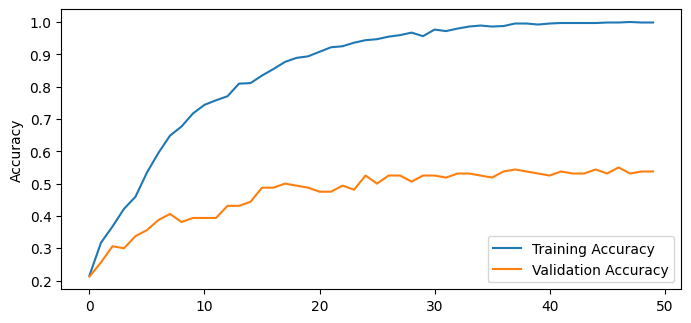

In [44]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

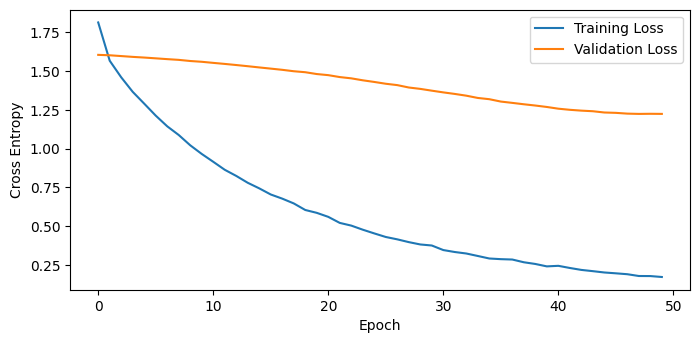

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

5/5 [==============================] - 0s 9ms/step


array([[27,  3,  1,  5,  1],
       [ 5, 15,  5,  5,  4],
       [ 4,  4, 13,  3,  5],
       [ 5,  4,  3, 16,  4],
       [ 1,  2,  5,  5, 15]])

In [47]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        37
           1       0.54      0.44      0.48        34
           2       0.48      0.45      0.46        29
           3       0.47      0.50      0.48        32
           4       0.52      0.54      0.53        28

    accuracy                           0.54       160
   macro avg       0.53      0.53      0.53       160
weighted avg       0.53      0.54      0.53       160



### Testing

In [48]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_2 (Flatten)         (None, 3232)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                206912    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                      

In [49]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [50]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 1s 502ms/step
[5.8174834e-02 4.4510677e-01 5.5074781e-02 4.4138744e-01 2.5619252e-04]
1
Predicted class: MR
